In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, sys

my_path = '/content/package'
save_path = '/content/drive/MyDrive/Colab Notebooks/package'

# colab notebooks 안에 package 폴더에 패키지 저장

os.symlink(save_path, my_path)

sys.path.insert(0, my_path)

In [ ]:
# var startClickConnect = function startClickConnect(){
#     var clickConnect = function clickConnect(){
#         console.log("Connnect Clicked - Start");
#         document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
#         console.log("Connnect Clicked - End");
#     };

#     var intervalId = setInterval(clickConnect, 60000);

#     var stopClickConnectHandler = function stopClickConnect() {
#         console.log("Connnect Clicked Stopped - Start");
#         clearInterval(intervalId);
#         console.log("Connnect Clicked Stopped - End");
#     };

#     return stopClickConnectHandler;
# };

# var stopClickConnect = startClickConnect();


# 정지시키고 싶으면

# stopClickConnect();

In [24]:
## 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import numpy as np
import warnings
import re
import torch
import matplotlib.pyplot as plt
import time
import seaborn as sns
# import copy
from tqdm import tqdm
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules
from scipy.stats import chi2_contingency
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
# from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds
from scipy.spatial.distance import cosine
from torch.nn import functional as F

warnings.filterwarnings('ignore')

dir_path = '/content/drive/MyDrive/분석 연습/kaggle/'
# dir_path = 'G:/내 드라이브/분석 연습/kaggle/'

# plt.rcParams['font.family'] = 'NanumBarunGothic'

random_state = 24

In [2]:
def csv_to_df(name : str, col_event_time : str ='event_time') :
  df = pd.read_csv(dir_path + name)
  df[col_event_time] = pd.to_datetime(df[col_event_time])

  return df

# 유형별 매출 전처리

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/분석 연습/kaggle/화장품_부문_유형별_매출액_2020_2021.csv', encoding='utf8')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   화장품부문유형별(1)  16 non-null     object
 1   2020         16 non-null     object
 2   2020.1       16 non-null     object
 3   2020.2       16 non-null     object
 4   2020.3       16 non-null     object
 5   2020.4       16 non-null     object
 6   2021         16 non-null     object
 7   2021.1       16 non-null     object
 8   2021.2       16 non-null     object
 9   2021.3       16 non-null     object
 10  2021.4       16 non-null     object
dtypes: object(11)
memory usage: 1.5+ KB


,화장품부문유형별(1),2020,2020.1,2020.2,2020.3,2020.4,2021,2021.1,2021.2,2021.3,2021.4
0,화장품부문유형별(1),사례수 (개),매출액(합계) (백만원),매출액(합계) (백만원),국내매출액 (백만원),수출액 (백만원),사례수 (개),매출액(합계) (백만원),매출액(합계) (백만원),국내매출액 (백만원),수출액 (백만원)
1,화장품부문유형별(1),소계,소계,비중 (%),소계,소계,소계,소계,비중 (%),소계,소계
2,전체,8404,40119810,100.0,32127465,7992345,10235,42090051,100.0,34316643,7773408
3,기초화장품 제품류,6391,27694932,69.0,22125202,5569730,8064,31551252,75.0,26452644,5098608
4,색조 화장용 제품류,826,3412784,8.5,2629108,783676,323,3534236,8.4,2359037,1175199
5,두발용 제품류,1489,1913805,4.8,1554669,359136,617,1019546,2.4,897649,121897
6,인체세정용 제품류,1351,2700554,6.7,2364847,335707,1108,3107811,7.4,2441362,666449
7,눈 화장용 제품류,309,333763,0.8,196609,137154,79,983218,2.3,524023,459194
8,두발 염색용 제품류,256,475578,1.2,354110,121468,152,163768,0.4,147897,15871
9,면도용 제품류,97,191758,0.5,173281,18477,17,71016,0.2,61426,9590


In [ ]:
# 컬럼명 변경

df.columns = df.iloc[0,:]

df.columns

Index(['화장품부문유형별(1)', '사례수 (개)', '매출액(합계) (백만원)', '매출액(합계) (백만원)',
       '국내매출액 (백만원)', '수출액 (백만원)', '사례수 (개)', '매출액(합계) (백만원)', '매출액(합계) (백만원)',
       '국내매출액 (백만원)', '수출액 (백만원)'],
      dtype='object', name=0)

In [ ]:
drop_list = [df.columns[i] for i in [2,3,7,8]]

df = df.drop(columns=drop_list, axis=1) # 비중과 합계 컬럼 제거

In [ ]:
# 첫 번째, 두 번째 행 drop
df.drop(index=list(range(0,3)), axis=0, inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True) # 인덱스 재설정

In [ ]:
df.rename({"화장품부문유형별(1)":"화장품 유형"}, axis=1, inplace=True) # 컬럼명 변경

df.columns

Index(['화장품 유형', '사례수 (개)', '국내매출액 (백만원)', '수출액 (백만원)', '사례수 (개)',
       '국내매출액 (백만원)', '수출액 (백만원)'],
      dtype='object', name=0)

In [ ]:
# 데이터 연도별로 분리 후 concat

df_2020 = df.iloc[:,1:4]
df_2021 = df.iloc[:,4:]

df_2020['연도'] = 2020
df_2021['연도'] = 2021

df_2020.insert(0,df.columns[0],df["화장품 유형"])
df_2021.insert(0,df.columns[0],df["화장품 유형"])

df_new = pd.concat([df_2020, df_2021], axis=0)

In [ ]:
# 데이터 타입 변경

dict_types = {df_new.columns[i] : 'int64' for i in range(1,5)}

df_new = df_new.astype(dict_types)

df_new.dtypes

0
화장품 유형         object
사례수 (개)         int64
국내매출액 (백만원)     int64
수출액 (백만원)       int64
연도              int64
dtype: object

In [ ]:
df_new.to_csv('/content/drive/MyDrive/분석 연습/kaggle/연도별_화장품 유형별 매출.csv', index=False, header=True)

# 유통 채널별 매출

In [ ]:
df_ch = pd.read_csv("/content/drive/MyDrive/분석 연습/kaggle/화장품_부문_유통채널별_매출_2020_2021.csv")

df_ch.info()

df_ch.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   시점             34 non-null     int64 
 1   화장품부문유통채널별(1)  34 non-null     object
 2   화장품부문유통채널별(2)  34 non-null     object
 3   매출액 (백만원)      34 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


,시점,화장품부문유통채널별(1),화장품부문유통채널별(2),매출액 (백만원)
0,2020,오프라인 판매,소계,15497034
1,2020,오프라인 판매,백화점,510677
2,2020,오프라인 판매,브랜드숍,493572
3,2020,오프라인 판매,편집숍,3141563
4,2020,오프라인 판매,대형마트/창고형 할인 매장/슈퍼마켓/편의점,847184


In [ ]:
# 컬럼명 변경

df_ch.columns = ["연도", "채널 (중)", "채널 (소)", "매출액 (백만원)"]

df_ch.columns

Index(['연도', '채널 (중)', '채널 (소)', '매출액 (백만원)'], dtype='object')

In [ ]:
# 소계 제거

df_ch.drop(index = df_ch[df_ch['채널 (소)'] == '소계'].index, axis=0, inplace=True)

df_ch[df_ch['채널 (소)'] == '소계']

,연도,채널 (중),채널 (소),매출액 (백만원)


In [ ]:
# 데이터 타입 변경

dict_dtypes2 = {df_ch.columns[i] : 'int64' for i in [0,3]}

df_ch = df_ch.astype(dict_dtypes2)

df_ch.dtypes

연도            int64
채널 (중)       object
채널 (소)       object
매출액 (백만원)     int64
dtype: object

In [ ]:
df_ch_2020 = df_ch[df_ch["연도"]==2020]

df_ch2 = pd.merge(left=df_ch, right=df_ch_2020, on=["채널 (중)", "채널 (소)"], suffixes=['_현재', "_전년"])

print(df_ch.shape[0])
print(df_ch2.shape[0])

# 이전 년도와의 비율 차이 계산

df_ch2 = df_ch2[['연도_현재', '채널 (중)', '채널 (소)', '매출액 (백만원)_현재', '매출액 (백만원)_전년']]

df_ch2["전년도 비율 차이"] = (df_ch2['매출액 (백만원)_현재'] - df_ch2['매출액 (백만원)_전년']) / df_ch2['매출액 (백만원)_전년']

df_ch2 = df_ch2[['연도_현재', '채널 (중)', '채널 (소)', '매출액 (백만원)_현재', "전년도 비율 차이"]]

df_ch2.columns = ["연도", '채널 (중)', '채널 (소)', '매출액 (백만원)', "전년도 비율 차이"]

df_ch2

30
30


,연도,채널 (중),채널 (소),매출액 (백만원),전년도 비율 차이
0,2020,오프라인 판매,백화점,510677,0.000000
1,2021,오프라인 판매,백화점,544048,0.065347
2,2020,오프라인 판매,브랜드숍,493572,0.000000
3,2021,오프라인 판매,브랜드숍,884289,0.791611
4,2020,오프라인 판매,편집숍,3141563,0.000000
5,2021,오프라인 판매,편집숍,2346426,-0.253102
6,2020,오프라인 판매,대형마트/창고형 할인 매장/슈퍼마켓/편의점,847184,0.000000
7,2021,오프라인 판매,대형마트/창고형 할인 매장/슈퍼마켓/편의점,1429238,0.687046
8,2020,오프라인 판매,피부관리실/에스테틱,429462,0.000000
9,2021,오프라인 판매,피부관리실/에스테틱,573554,0.335517


In [ ]:
idx_zero = df_ch2[df_ch2['전년도 비율 차이'] == 0].index

df_ch2.loc[idx_zero, '전년도 비율 차이'] = None

# df_ch2

In [ ]:
df_ch2.to_csv('/content/drive/MyDrive/분석 연습/kaggle/연도별_화장품 채널별 매출.csv', index=False, header=True)

----

# 요일별 매출 독립성 검정

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/분석 연습/kaggle/perchase_per_day.csv")

df

,yr_m,day,day_week,count_perchase_per_w
0,2020-01,17,fri,1043
1,2020-01,18,sat,796
2,2020-01,19,sun,960
3,2020-01,20,mon,1147
4,2020-01,21,tue,1189
...,...,...,...,...
147,2019-10,27,sun,927
148,2019-10,28,mon,1019
149,2019-10,29,tue,944
150,2019-10,30,wed,912


In [ ]:
df_pivot = df.groupby(['yr_m', 'day_week'])['count_perchase_per_w'].sum()

In [ ]:
df_pivot = df_pivot.reset_index(level=1, drop=False)

In [ ]:
df_pivot = df_pivot.pivot_table(values='count_perchase_per_w', index='yr_m', columns='day_week')

In [ ]:
chi2_cont = chi2_contingency(observed=df_pivot, correction=False)

print(chi2_cont)

Chi2ContingencyResult(statistic=3691.0968752942936, pvalue=0.0, dof=24, expected_freq=array([[4418.63273111, 4345.84553999, 3554.75382618, 3706.51887159,
        4646.93688471, 4451.46200546, 4354.85014096],
       [5503.54279278, 5412.88411045, 4427.55508111, 4616.58310689,
        5787.90262885, 5544.43266239, 5424.09961754],
       [4342.03850046, 4270.5130297 , 3493.13439522, 3642.26868863,
        4566.38514455, 4374.29869989, 4279.36154155],
       [4868.15542729, 4787.96334502, 3916.3911519 , 4083.59577704,
        5119.6857472 , 4904.32453656, 4797.88401499],
       [4421.63054836, 4348.79397484, 3557.16554559, 3709.03355585,
        4650.0895947 , 4454.4820957 , 4357.80468496]]))


# 브랜드 분석

In [ ]:
# # runail 가격

# df_runail = pd.read_csv('/content/drive/MyDrive/분석 연습/kaggle/price_runail.csv')

# df_runail.info()
# df_runail.head()

## 브랜드 퍼널

In [ ]:
df_brand = pd.read_csv('/content/drive/MyDrive/분석 연습/kaggle/funnel_brand_new.csv')

df_brand.info()
df_brand.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         4669 non-null   object
 1   brand        4649 non-null   object
 2   event_type   4669 non-null   object
 3   count_event  4669 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 146.0+ KB


,date,brand,event_type,count_event
0,2019-12,f.o.x,remove_from_cart,1116
1,2019-12,cnd,view,7666
2,2019-12,runail,cart,20055
3,2019-12,freedecor,view,4974
4,2019-12,NaN,view,172299


In [ ]:
# 특정 브랜드만 추출

List_extract = ['strong', 'marathon', 'runail', 'domix', 'ingarden']

df_b2 = df_brand[df_brand['brand'].isin(List_extract)]

df_b2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2 to 4511
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         100 non-null    object
 1   brand        100 non-null    object
 2   event_type   100 non-null    object
 3   count_event  100 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


In [ ]:
# pivot

df_pv = df_b2.pivot(index=['date', 'brand'], columns='event_type', values='count_event')

df_pv.reset_index(level=[0,1], drop=False, inplace=True)

In [ ]:
# 컬럼 순서 변경

df_pv.columns.name = None

df_pv = df_pv[['date', 'brand', 'view', 'cart', 'remove_from_cart', 'purchase']]

df_pv.head()

,date,brand,view,cart,remove_from_cart,purchase
0,2019-10,domix,8279,5533,2709,2088
1,2019-10,ingarden,12729,8873,4995,2573
2,2019-10,marathon,2733,250,158,53
3,2019-10,runail,43223,22776,12310,7938
4,2019-10,strong,5133,627,321,144


In [ ]:
# 날짜별, 브랜드별로 정렬

df_pv.sort_values(by=['date', 'brand'], ascending=[True, True], inplace=True)

df_pv.head(10)

,date,brand,view,cart,remove_from_cart,purchase
0,2019-10,domix,8279,5533,2709,2088
1,2019-10,ingarden,12729,8873,4995,2573
2,2019-10,marathon,2733,250,158,53
3,2019-10,runail,43223,22776,12310,7938
4,2019-10,strong,5133,627,321,144
5,2019-11,domix,9169,5742,3094,2393
6,2019-11,ingarden,13964,9978,5996,3767
7,2019-11,marathon,3090,355,205,75
8,2019-11,runail,45612,24574,13822,10009
9,2019-11,strong,5307,801,406,198


## 브랜드 ARPPU

In [ ]:
# 월별, 브랜드별 arppu

brand_arppu = pd.read_csv('/content/drive/MyDrive/분석 연습/kaggle/arppu_brand.csv')

brand_arppu.info()
brand_arppu.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1260 non-null   object 
 1   brand   1255 non-null   object 
 2   ARPPU   1106 non-null   float64
 3   sales   1106 non-null   float64
dtypes: float64(2), object(2)
memory usage: 39.5+ KB


,date,brand,ARPPU,sales
0,2019-11,NaN,24.541823,619509.24
1,2019-11,freedecor,3.665456,7671.80
2,2019-11,grattol,13.835213,71472.71
3,2019-11,italwax,13.121360,24799.37
4,2019-11,severina,3.481502,6120.48


In [ ]:
# 특정 브랜드만 추출

brand_arppu = brand_arppu[brand_arppu['brand'].isin(List_extract)]

## join

In [ ]:
df_join = pd.merge(left=df_pv, right=brand_arppu, on=['date', 'brand'], how='inner', suffixes=['_x', '_y'])

df_join.info()
df_join.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              25 non-null     object 
 1   brand             25 non-null     object 
 2   view              25 non-null     int64  
 3   cart              25 non-null     int64  
 4   remove_from_cart  25 non-null     int64  
 5   purchase          25 non-null     int64  
 6   ARPPU             25 non-null     float64
 7   sales             25 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ KB


,date,brand,view,cart,remove_from_cart,purchase,ARPPU,sales
0,2019-10,domix,8279,5533,2709,2088,5.015350,10472.05
1,2019-10,ingarden,12729,8873,4995,2573,9.001706,23161.39
2,2019-10,marathon,2733,250,158,53,137.372642,7280.75
3,2019-10,runail,43223,22776,12310,7938,9.012255,71539.28
4,2019-10,strong,5133,627,321,144,202.754375,29196.63


In [ ]:
df_join.loc[0,'sales'] / df_join.loc[0,'purchase']

5.015349616858216

In [ ]:
# .xlsx로 저장
df_join.to_excel(dir_path+'brand_arppu.xlsx', sheet_name='ARPPU', header=True, index=False)

# ingarden remove에 영향을 미치는 브랜드?

## 전처리

In [ ]:
df_ig = pd.read_csv(dir_path+'cart_something_remove_ingarden.csv')

df_ig.info()
df_ig.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    836 non-null    object
 1   brand   836 non-null    object
 2   counts  836 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 19.7+ KB


,date,brand,counts
0,2019-10,runail,1234
1,2019-10,irisk,980
2,2019-10,masura,581
3,2019-10,grattol,522
4,2019-10,bpw.style,427


In [ ]:
date_origin = df_ig['date'].unique()

date_list = [re.sub(r'-', '_',i) for i in date_origin]

In [ ]:
# 월별로 변수 분리

for i in range(len(date_list)) :
  globals()['top5_counts_'+date_list[i]] = df_ig[df_ig['date']==date_origin[i]]
  globals()['top5_counts_'+date_list[i]].sort_values(by='counts', ascending=False, inplace=True)
  globals()['top5_counts_'+date_list[i]] = globals()['top5_counts_'+date_list[i]].head(5)

In [ ]:
# 다시 concat

df_ig2 = pd.concat([globals()['top5_counts_'+date_list[i]] for i in range(5)], axis=0)

df_ig2

,date,brand,counts
0,2019-10,runail,1234
1,2019-10,irisk,980
2,2019-10,masura,581
3,2019-10,grattol,522
4,2019-10,bpw.style,427
168,2019-11,runail,1520
169,2019-11,irisk,1129
170,2019-11,grattol,929
171,2019-11,masura,631
172,2019-11,bpw.style,583


In [ ]:
# 연도와 brand 순으로 정렬

df_ig2['date'] = pd.to_datetime(df_ig2['date'])

df_ig2.sort_values(by=['brand', 'date'], ascending=[False, True], inplace=True)

df_ig2.reset_index(drop=True, inplace=True)

df_ig2

,date,brand,counts
0,2020-01-01,uno,265
1,2020-02-01,uno,249
2,2019-10-01,runail,1234
3,2019-11-01,runail,1520
4,2019-12-01,runail,1059
5,2020-01-01,runail,1230
6,2020-02-01,runail,1143
7,2019-10-01,masura,581
8,2019-11-01,masura,631
9,2019-12-01,masura,382


In [ ]:
df_ig_g = df_ig2.groupby('brand').mean('counts').sort_values(by='counts', ascending=False)

df_ig_g['rate'] = round(df_ig_g['counts'] / 4987.2, 2)

df_ig_g

,counts,rate
brand,,
runail,1237.2,0.25
irisk,911.2,0.18
grattol,682.6,0.14
masura,523.4,0.10
bpw.style,446.0,0.09
uno,257.0,0.05


In [ ]:
df_ig_g['rate per remove'].sum()

0.81

## 연관규칙 분석 시도

In [ ]:
df_asc = pd.read_csv(dir_path+'raw_data_ingarden_association_rule.csv')

df_asc.info()
df_asc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44035 entries, 0 to 44034
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     44035 non-null  object
 1   brand    44035 non-null  object
 2   session  44035 non-null  object
 3   counts   44035 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


,date,brand,session,counts
0,2019-10,runail,79ff3889-af61-4206-bf04-eb209aeb4054,1
1,2019-10,irisk,66978ef2-61a0-4f9c-b073-cea13e6ea65f,1
2,2019-10,solomeya,66978ef2-61a0-4f9c-b073-cea13e6ea65f,1
3,2019-10,s.care,79ff3889-af61-4206-bf04-eb209aeb4054,1
4,2019-10,swarovski,3110d1f7-fc28-4771-8b72-50b5ae8c7aa5,1


In [ ]:
# counts 확인

df_asc['counts'].unique()

array([1])

In [ ]:
# 새로운 데이터 프레임 생성

df_asc_new = df_asc.pivot_table(columns='brand', index='session', values='counts')

df_asc_new.reset_index(drop=True, inplace=True)

df_asc_new.replace({np.nan : 0}, inplace=True)

df_asc_new.head()

brand,airnails,almea,andrea,ardell,arganoil,art-visage,artex,aura,avene,balbcare,...,uskusi,veraclara,vichy,vilenta,vosev,yllozure,yoko,ypsed,zeitun,zinger
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# te = TransactionEncoder()
# te_ary = te.fit(df_asc_new).transform(df_asc_new)
# te_ary

In [ ]:
df_asc_new = df_asc_new.astype(bool)

df_asc_new.dtypes

brand
airnails    bool
almea       bool
andrea      bool
ardell      bool
arganoil    bool
            ... 
yllozure    bool
yoko        bool
ypsed       bool
zeitun      bool
zinger      bool
Length: 221, dtype: object

In [ ]:
# remove된 ingarden도 추가

df_asc_new["removed ingarden"] = True

df_asc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15848 entries, 0 to 15847
Columns: 222 entries, airnails to removed ingarden
dtypes: bool(222)
memory usage: 3.4 MB


In [ ]:
# apriori

frequency_brand = apriori(df_asc_new, min_support=0.05, use_colnames=True)

frequency_brand

,support,itemsets
0,0.056790,(bluesky)
1,0.116355,(bpw.style)
2,0.056537,(de.lux)
3,0.072943,(domix)
4,0.068905,(freedecor)
5,0.223561,(grattol)
6,0.059692,(haruyama)
7,0.299218,(irisk)
8,0.053256,(lianail)
9,0.169233,(masura)


In [ ]:
asc_rules = association_rules(frequency_brand, metric="lift", min_threshold=1)

In [ ]:
asc_rules.info()
asc_rules.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         94 non-null     object 
 1   consequents         94 non-null     object 
 2   antecedent support  94 non-null     float64
 3   consequent support  94 non-null     float64
 4   support             94 non-null     float64
 5   confidence          94 non-null     float64
 6   lift                94 non-null     float64
 7   leverage            94 non-null     float64
 8   conviction          94 non-null     float64
 9   zhangs_metric       94 non-null     float64
dtypes: float64(8), object(2)
memory usage: 7.5+ KB


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(removed ingarden),(bluesky),1.000000,0.056790,0.056790,0.056790,1.000000,0.000000,1.000000,0.000000
1,(bluesky),(removed ingarden),0.056790,1.000000,0.056790,1.000000,1.000000,0.000000,inf,0.000000
2,(bpw.style),(irisk),0.116355,0.299218,0.053004,0.455531,1.522409,0.018188,1.287094,0.388331
3,(irisk),(bpw.style),0.299218,0.116355,0.053004,0.177140,1.522409,0.018188,1.073871,0.489662
4,(runail),(bpw.style),0.410146,0.116355,0.062847,0.153231,1.316920,0.015124,1.043548,0.407987


In [ ]:
asc_rules[(asc_rules['consequents'].str.contains('removed ingarden', regex=False)) & (asc_rules['lift'] > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
50,(bpw.style),"(removed ingarden, irisk)",0.116355,0.299218,0.053004,0.455531,1.522409,0.018188,1.287094,0.388331
51,(irisk),"(removed ingarden, bpw.style)",0.299218,0.116355,0.053004,0.177140,1.522409,0.018188,1.073871,0.489662
55,(runail),"(removed ingarden, bpw.style)",0.410146,0.116355,0.062847,0.153231,1.316920,0.015124,1.043548,0.407987
57,(bpw.style),"(runail, removed ingarden)",0.116355,0.410146,0.062847,0.540130,1.316920,0.015124,1.282653,0.272341
62,(grattol),"(removed ingarden, irisk)",0.223561,0.299218,0.068084,0.304544,1.017802,0.001191,1.007659,0.022526
63,(irisk),"(removed ingarden, grattol)",0.299218,0.223561,0.068084,0.227541,1.017802,0.001191,1.005152,0.024958
67,(masura),"(removed ingarden, grattol)",0.169233,0.223561,0.052814,0.312081,1.395950,0.014980,1.128677,0.341422
69,(grattol),"(masura, removed ingarden)",0.223561,0.169233,0.052814,0.236240,1.395950,0.014980,1.087734,0.365312
73,(runail),"(removed ingarden, grattol)",0.410146,0.223561,0.096731,0.235846,1.054951,0.005039,1.016076,0.088307
75,(grattol),"(runail, removed ingarden)",0.223561,0.410146,0.096731,0.432684,1.054951,0.005039,1.039727,0.067086


## 연관규칙 분석 시도2

In [ ]:
df = pd.read_csv(dir_path+'cart_and_removed.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643092 entries, 0 to 643091
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        643092 non-null  int64 
 1   competitor     643092 non-null  object
 2   removed_brand  643092 non-null  object
 3   user_session   643092 non-null  object
 4   date           643092 non-null  object
dtypes: int64(1), object(4)
memory usage: 24.5+ MB


,user_id,competitor,removed_brand,user_session,date
0,407192905,ingarden,removed meisterwerk,88fa4a31-7291-4435-997b-43af1191d6a2,2019-12-14
1,446071693,staleks,removed glysolid,d97b0070-a11f-4076-bc85-28907379aa9d,2019-12-14
2,446071693,staleks,removed profhenna,d97b0070-a11f-4076-bc85-28907379aa9d,2019-12-14
3,446071693,staleks,removed luxvisage,d97b0070-a11f-4076-bc85-28907379aa9d,2019-12-14
4,446071693,staleks,removed bielenda,d97b0070-a11f-4076-bc85-28907379aa9d,2019-12-14


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# df['date']

In [ ]:
df_session = df['user_session'].unique()

df_user_id = df['user_id'].unique()

df_date = df['date'].unique()

print('session 수 : ',len(df_session))
print('user_id 수 : ',len(df_user_id))
print('date 수 : ',len(df_date))

session 수 :  96514
user_id 수 :  57921
date 수 :  92


In [ ]:
df_dup = df[df.duplicated(subset=['user_id', 'user_session', 'date'], keep='last')][['user_id', 'user_session', 'date']]

df_dup.reset_index(drop=True, inplace=True)

df_dup.sort_values(by='date', ascending=True, inplace=True)

df_dup

,user_id,user_session,date
141807,405986628,12710291-238c-4492-9a07-7cb5c34ba956,2019-10-01
28024,401329661,9ad1b6fa-781b-45f1-970a-e4e9adf8ce38,2019-10-01
28025,512677005,5160e312-ea53-4346-ae6f-f9b3e80a2dac,2019-10-01
28026,549854453,a3b7a814-7b81-4484-b328-255fa537b3ee,2019-10-01
28027,523939534,e9146186-55b5-463c-869e-6a3bcd71fc1f,2019-10-01
...,...,...,...
502156,592638076,c8dbb96b-a29b-4dbe-b573-4a9daace20f4,2019-12-31
502155,595058034,8ded501d-a883-4006-ae24-618e09f145f1,2019-12-31
502154,592638076,c8dbb96b-a29b-4dbe-b573-4a9daace20f4,2019-12-31
100098,555410482,cb08cd6f-3600-4bb1-b24a-5769829fc63b,2019-12-31


In [ ]:
# # 동일 세션별로, brand와 removed brand를 하나의 리스트로 저장

# brand_list = []

# cnt = 0

# for i in tqdm(range(df_dup.shape[0])) :
#   df_mini = df[(df['user_id'] == df_dup.iloc[i, 0]) & (df['user_session'] == df_dup.iloc[i, 1]) & (df['date'] == df_dup.iloc[i, 2])]
#   comp_set = set(df_mini['competitor'])
#   removed_set = set(df_mini['removed_brand'])

#   comp_set.update(removed_set)

#   comp_list = list(comp_set)

#   brand_list.append(comp_list)

# print(brand_list)

## 연관규칙 분석 시도3

In [ ]:
df = pd.read_json(dir_path + 'cart_and_removed_json.json', orient='records', lines=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100804 entries, 0 to 100803
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        100804 non-null  int64         
 1   user_session   100804 non-null  object        
 2   date           100804 non-null  datetime64[ns]
 3   competitor     100804 non-null  object        
 4   removed_brand  100804 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.8+ MB


,user_id,user_session,date,competitor,removed_brand
0,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,[runail],[removed airnails]
1,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,"[lovely, lovely, lovely, lovely, lovely, lovel...","[removed runail, removed irisk, removed bpw.st..."
2,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733,2019-10-01,[kapous],[removed estel]
3,524009100,8bbff347-0be1-470e-8860-d9a75db965b2,2019-10-01,[estel],[removed concept]
4,546705258,3b5c65c0-bb1c-453b-b340-4ebf973a3136,2019-10-01,"[grattol, grattol, grattol, irisk, de.lux]","[removed irisk, removed runail, removed de.lux..."


In [ ]:
df['all'] = df['competitor'] + df['removed_brand']

df['all'] = df['all'].apply(lambda x : list(set(x)))

df['all']

0                                [runail, removed airnails]
1         [removed de.lux, removed nagaraku, nagaraku, r...
2                                   [kapous, removed estel]
3                                  [estel, removed concept]
4         [removed de.lux, grattol, removed irisk, irisk...
                                ...                        
100799                          [haruyama, removed grattol]
100800                         [removed kinetics, roubloff]
100801    [ingarden, removed domix, bluesky, grattol, ru...
100802                                  [removed oniq, cnd]
100803    [runail, removed irisk, removed ingarden, inga...
Name: all, Length: 100804, dtype: object

In [ ]:
brand_all = df['all'].to_list()

brand_all

[['runail', 'removed airnails'],
 ['removed de.lux',
  'removed nagaraku',
  'nagaraku',
  'removed irisk',
  'lovely',
  'removed ingarden',
  'removed runail',
  'removed yoko',
  'removed jessnail',
  'removed milv',
  'removed lovely',
  'removed bpw.style'],
 ['kapous', 'removed estel'],
 ['estel', 'removed concept'],
 ['removed de.lux',
  'grattol',
  'removed irisk',
  'irisk',
  'removed runail',
  'de.lux'],
 ['removed depilflax', 'removed irisk', 'italwax', 'removed kapous'],
 ['nagaraku', 'pole', 'irisk', 'removed farmstay'],
 ['irisk', 'removed yoko'],
 ['smart',
  'runail',
  'rosi',
  'zinger',
  'removed runail',
  'haruyama',
  'removed smart',
  'removed zinger',
  'masura'],
 ['removed lianail',
  'runail',
  'removed ingarden',
  'removed estelare',
  'removed polarus',
  'removed uskusi',
  'removed grattol',
  'removed bpw.style',
  'removed aura',
  'removed haruyama',
  'removed runail',
  'removed yoko',
  'removed tertio',
  'removed zinger',
  'de.lux',
  'rem

In [ ]:
te = TransactionEncoder()

te.fit(brand_all)

brand_te = te.transform(brand_all)

brand_te
# df_te = pd.DataFrame(brand_te)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
brand_all_te = pd.DataFrame(data = brand_te, columns = te.columns_)

brand_all_te

,airnails,almea,andrea,ardell,art-visage,artex,aura,avene,babyliss,balbcare,...,vilenta,vosev,weaver,yllozure,yoko,ypsed,yu-r,zab,zeitun,zinger
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100801,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequency_brand = apriori(brand_all_te, min_support=0.02, use_colnames=True)

frequency_brand

,support,itemsets
0,0.044998,(bluesky)
1,0.094877,(bpw.style)
2,0.033788,(concept)
3,0.030326,(cosmoprofi)
4,0.032320,(de.lux)
...,...,...
172,0.061595,"(runail, removed runail, removed irisk)"
173,0.032409,"(runail, removed runail, removed masura)"
174,0.020694,"(runail, removed runail, grattol, removed grat..."
175,0.050762,"(runail, removed runail, removed irisk, irisk)"


In [ ]:
asc_rules = association_rules(frequency_brand, metric="lift", min_threshold=1)

asc_rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         392 non-null    object 
 1   consequents         392 non-null    object 
 2   antecedent support  392 non-null    float64
 3   consequent support  392 non-null    float64
 4   support             392 non-null    float64
 5   confidence          392 non-null    float64
 6   lift                392 non-null    float64
 7   leverage            392 non-null    float64
 8   conviction          392 non-null    float64
 9   zhangs_metric       392 non-null    float64
dtypes: float64(8), object(2)
memory usage: 30.8+ KB


In [ ]:
asc_rules[asc_rules['consequents'].str.contains('removed ingarden', regex=False)].sort_values(by=['lift', 'confidence'], ascending=[False, False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
209,(ingarden),"(irisk, removed ingarden)",0.113269,0.033649,0.020624,0.182081,5.411110,0.016813,1.181475,0.919327
235,(ingarden),"(runail, removed ingarden)",0.113269,0.044373,0.027142,0.239622,5.400139,0.022116,1.256778,0.918903
231,"(runail, ingarden)",(removed ingarden),0.048927,0.107327,0.027142,0.554745,5.168728,0.021891,2.004856,0.848020
227,(ingarden),"(removed runail, removed ingarden)",0.113269,0.040018,0.023382,0.206428,5.158357,0.018849,1.209698,0.909115
206,"(ingarden, irisk)",(removed ingarden),0.038044,0.107327,0.020624,0.542112,5.051028,0.016541,1.949545,0.833739
224,"(ingarden, removed runail)",(removed ingarden),0.044889,0.107327,0.023382,0.520884,4.853239,0.018564,1.863166,0.831267
62,(ingarden),(removed ingarden),0.113269,0.107327,0.051179,0.451830,4.209845,0.039022,1.628461,0.859857
329,(runail),"(removed runail, removed ingarden)",0.303480,0.040018,0.027013,0.089010,2.224240,0.014868,1.053779,0.790226
330,(removed runail),"(runail, removed ingarden)",0.274553,0.044373,0.027013,0.098388,2.217294,0.014830,1.059910,0.756774
233,(runail),"(ingarden, removed ingarden)",0.303480,0.051179,0.027142,0.089435,1.747513,0.011610,1.042014,0.614136


# RFM 연습

## 데이터 합치기

In [ ]:
# 연도별로 흩어져 있는 데이터 하나로 합치기

month_list = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb']

df_Oct = pd.read_csv(dir_path+'2019-Oct.csv')
df_Nov = pd.read_csv(dir_path+'2019-Nov.csv')
df_Dec = pd.read_csv(dir_path+'2019-Dec.csv')
df_Jan = pd.read_csv(dir_path+'2020-Jan.csv')
df_Feb = pd.read_csv(dir_path+'2020-Feb.csv')

dfs = [globals()['df_' + i] for i in month_list]

df = pd.concat(dfs, axis=0)

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20692840 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ GB


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [ ]:
# reset_index

df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [ ]:
# save concat data

df.to_csv(dir_path+'ecommerce_data_2019-2020.csv', header=True, index=False)

## RFM 계산

## EDA 및 RFM 계산

In [ ]:
df = csv_to_df('ecommerce_data_2019-2020.csv')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 1.4+ GB


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [ ]:
# 개수 파악
df.count()

event_time       20692840
event_type       20692840
product_id       20692840
category_id      20692840
category_code      353594
brand            11935723
price            20692840
user_id          20692840
user_session     20688242
dtype: int64

In [ ]:
# 통계치 확인

df.describe(include='all')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,20692840,20692840,2.069284e+07,2.069284e+07,353594,11935723,2.069284e+07,2.069284e+07,20688242
unique,NaN,4,NaN,NaN,12,273,NaN,NaN,4535941
top,NaN,view,NaN,NaN,appliances.environment.vacuum,runail,NaN,NaN,74206ba1-c863-4760-bbdc-b11777059e46
freq,NaN,9657821,NaN,NaN,149168,1528908,NaN,NaN,5411
mean,2019-12-16 05:44:37.495470080+00:00,NaN,5.484297e+06,1.554230e+18,NaN,NaN,8.534735e+00,5.215527e+08,NaN
min,2019-10-01 00:00:00+00:00,NaN,3.752000e+03,1.487580e+18,NaN,NaN,-7.937000e+01,4.654960e+05,NaN
25%,2019-11-08 13:35:44.500000+00:00,NaN,5.724650e+06,1.487580e+18,NaN,NaN,2.060000e+00,4.818306e+08,NaN
50%,2019-12-13 02:48:02+00:00,NaN,5.810720e+06,1.487580e+18,NaN,NaN,4.050000e+00,5.531297e+08,NaN
75%,2020-01-25 12:54:33+00:00,NaN,5.857864e+06,1.487580e+18,NaN,NaN,7.060000e+00,5.788573e+08,NaN
max,2020-02-29 23:59:59+00:00,NaN,5.932595e+06,2.242903e+18,NaN,NaN,3.277800e+02,6.220902e+08,NaN


In [ ]:
# price가 음수인 경우?

neg_price = df[df['price'] < 0]

neg_price.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
112860,2019-10-01 19:10:56+00:00,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,552507528,dcdd60c6-1a70-442d-bfb2-0252879054ad
198302,2019-10-02 08:30:03+00:00,purchase,5716855,1487580014042939619,NaN,NaN,-7.94,550375225,5ddec778-9464-4514-914d-be7b751b8e2c
436918,2019-10-03 17:37:04+00:00,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,555414763,479149eb-1807-4178-8f6b-87c642350735
443204,2019-10-03 18:25:39+00:00,purchase,5670257,1487580014042939619,NaN,NaN,-15.87,556383221,4333d203-bc4d-4d0d-a6e1-0ea3a97a28c1
1295556,2019-10-09 14:49:14+00:00,purchase,5716855,1487580014042939619,NaN,NaN,-7.94,514562574,fed2aeb4-0c75-44f7-9ca8-1a8be8214779


In [ ]:
neg_price.shape

(131, 10)

In [ ]:
# 연월일만 추출

neg_price['event_time_ymd'] = neg_price['event_time'].dt.strftime('%Y-%m-%d')

neg_price['event_time_ymd'].head()

112860     2019-10-01
198302     2019-10-02
436918     2019-10-03
443204     2019-10-03
1295556    2019-10-09
Name: event_time_ymd, dtype: object

In [ ]:
# 가격이 0인 제품의 브랜드?
neg_price['brand'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
# 가격이 0인 제품의 이벤트?

neg_price['event_type'].value_counts()

event_type
purchase            126
remove_from_cart      3
view                  2
Name: count, dtype: int64

In [ ]:
# 가격이 0인 제품의 id와 event별 price count

neg_price.groupby(['event_type', 'product_id'])['price'].count().reset_index(level=[0,1], drop=False).sort_values(by=['product_id'], ascending=[True])

,event_type,product_id,price
0,purchase,5670257,39
1,purchase,5716855,12
2,purchase,5716857,34
5,remove_from_cart,5716857,2
7,view,5716857,1
3,purchase,5716859,30
6,remove_from_cart,5716859,1
4,purchase,5716861,11
8,view,5716861,1


100%|██████████| 5/5 [00:00<00:00, 361.85it/s]


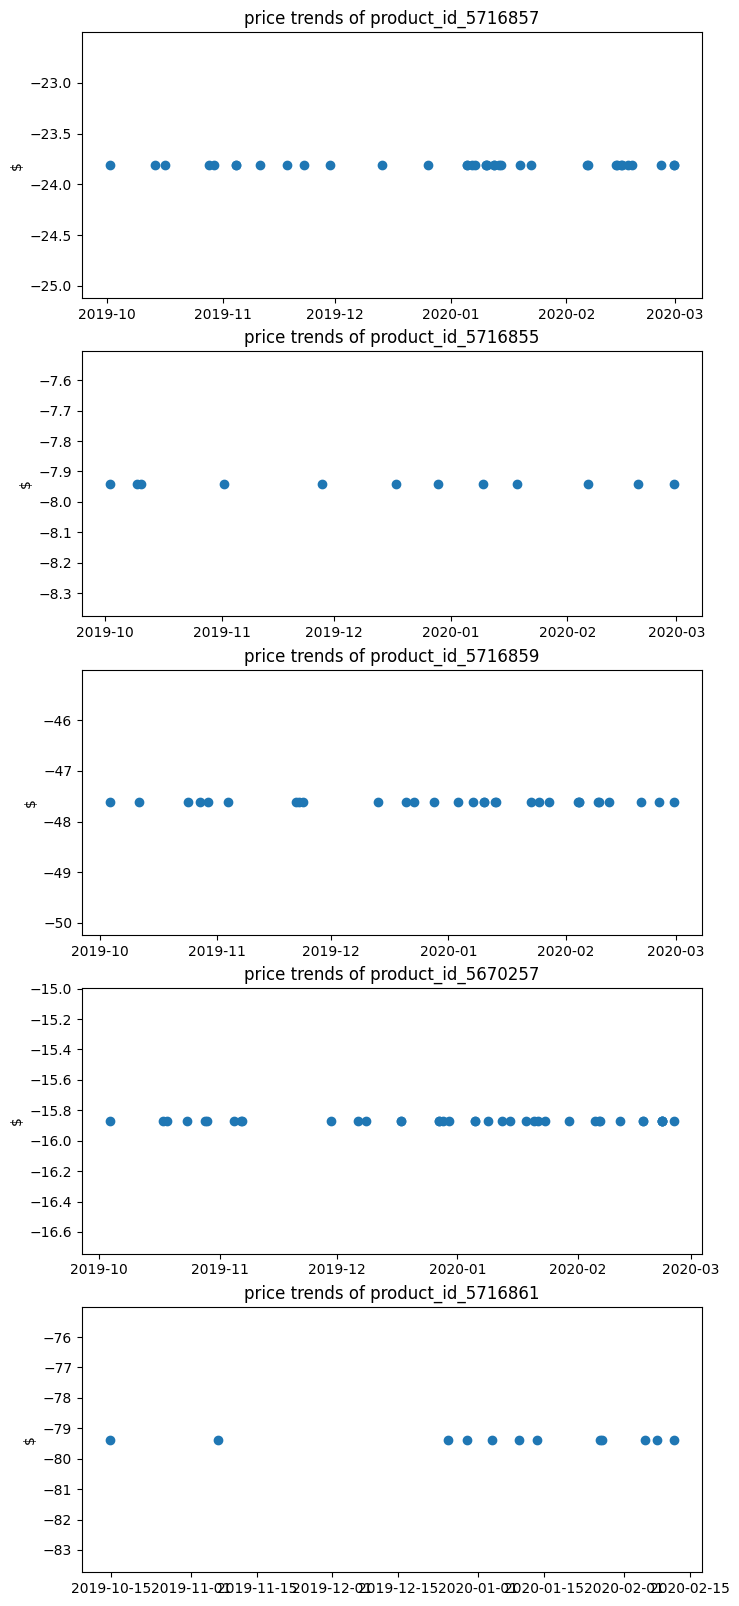

In [ ]:
# 날짜에 따른 가격 변동 확인(해당 제품은 계속 음수인가?)

neg_id = neg_price['product_id'].unique()

fig, axes = plt.subplots(figsize=(8,20), nrows=len(neg_id), ncols=1)

for i in tqdm(range(len(neg_id))) :

  df_neg_id_i = neg_price[neg_price['product_id'] == neg_id[i]]

  axes[i].plot_date(x=df_neg_id_i['event_time'], y=df_neg_id_i['price'])

  axes[i].set_title(f'price trends of product_id_{neg_id[i]}')

  axes[i].set_ylabel('$')

plt.show()

가격이 음수로 표시된 제품의 브랜드는 존재하지 않고, 특정 제품의 가격이 음수로 표시됩니다.

음수였던 가격이 바뀌는 경우는 없습니다.

해당 제품을 같이 구매했을 때 할인을 받게 되는 구조라고 가정해 볼 수 있겠습니다.

In [ ]:
# 가격이 음수인 제품이랑 같이 구매된 제품은?

df_neg_id = df[df['product_id'].isin(neg_id)]

neg_session = df_neg_id['user_session'].unique()

neg_user = df_neg_id['user_id'].unique()

df_neg_purchase = df[(df['user_session'].isin(neg_session)) & (df['user_id'].isin(neg_user)) & (df['event_type']=='purchase')]

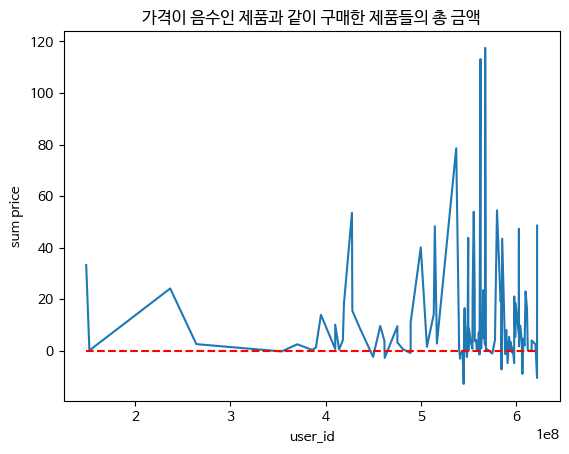

In [ ]:
neg_sum = df_neg_purchase.groupby(['user_id', 'user_session'])['price'].sum().reset_index(level=[0,1], drop=False)

neg_sum.columns

plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.plot(neg_sum['user_id'], neg_sum['price'])
plt.plot(neg_sum['user_id'], [0 for i in range(neg_sum['price'].shape[0])], color='r', linestyle='dashed')

plt.title('가격이 음수인 제품과 같이 구매한 제품들의 총 금액')

plt.xlabel('user_id')

plt.ylabel('sum price')

plt.show()

해당 제품을 구매할 당시 총 금액이 일정 금액 이상일 줄 알았으나, 음수인 부분도 존재하는 것을 확인했습니다.

가격이 음수인 제품만 구매해도 가격이 음수인 것을 확인했으므로, 해당 제품의 가격은 오류로 판단됩니다.

따라서 가격이 양수가 아닌 제품을 모델링에 이용하는 것은 제품 추천에 영향을 줄 수 있으므로 제거를 고려해야겠습니다.

In [ ]:
# 가격이 양수가 아닌 이벤트의 비율

df[df['price'] <= 0].shape[0] / df.shape[0]

0.005039810871779804

In [ ]:
# 비율이 전체 이벤트 데이터에 0.5% 이므로 제거해도 무방하다고 판단

df2 = df[df['price'] > 0]

df2.reset_index(drop=True, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20588552 entries, 0 to 20588551
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 1.4+ GB


In [ ]:
# 2020년 3월 1일을 기준으로 사용자의 rfm을 계산

class rfm :

  def __init__(self, dataframe, ts : str = '2020-03-01 00:00:00'):

    self.ts = ts

    dataframe2 = dataframe[(dataframe['event_type'] == 'purchase') & (dataframe['event_time'] <= pd.Timestamp(self.ts, tz='UTC'))]
    dataframe2['event_time1'] = dataframe2['event_time'].dt.strftime('%Y-%m-%d')
    dataframe2['event_time2'] = dataframe2['event_time'].dt.strftime('%Y-%m')
    dataframe2.sort_values(by='event_time', ascending=True, inplace=True)

    self.dataframe = dataframe2

  def recent_date(self) :

    df_recency = self.dataframe.drop_duplicates(subset='user_id', keep='last')

    df_recency = df_recency[['user_id', 'event_time']]

    df_recency.rename(columns={'event_time' : 'recency'}, inplace=True)

    df_recency.reset_index(drop=True, inplace=True)

    self.df_recency = df_recency

    return self.df_recency

  def count_active(self) :

    # 사용자별, 일별로 제품의 구매 여부를 count

    df_frequency = self.dataframe.drop_duplicates(subset=['user_id', 'product_id', 'event_time1'], keep='last')

    df_frequency = df_frequency.groupby(['user_id', 'product_id'])['event_time1'].count()

    df_frequency = df_frequency.reset_index(level=[0, 1], drop=False).groupby(['user_id'])['event_time1'].sum()

    df_frequency.rename('frequency', inplace=True)

    df_frequency = df_frequency.reset_index(drop=False)

    self.df_frequency = df_frequency

    return self.df_frequency

  def sum_price(self) :

    df_sum = self.dataframe.groupby('user_id')['price'].sum()

    df_sum.rename('monetary', inplace=True)

    df_sum = df_sum.reset_index(drop=False)

    self.df_sum = df_sum

    return self.df_sum

  def join_rfm(self) :

    df_recency = self.recent_date()
    df_frequency = self.count_active()
    df_sum = self.sum_price()

    df_join = df_recency.merge(df_frequency, on='user_id').merge(df_sum, on='user_id')

    df_join = df_join.sort_values(by=['frequency', 'monetary', 'recency'], ascending=[False, False, False], axis=0)

    self.df_join = df_join

    return self.df_join

In [ ]:
# rfm table
df_rfm = rfm(df2).join_rfm()

df_rfm.info()
df_rfm.head()

<class 'pandas.core.frame.DataFrame'>
Index: 110518 entries, 108739 to 906
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   user_id    110518 non-null  int64              
 1   recency    110518 non-null  datetime64[ns, UTC]
 2   frequency  110518 non-null  int64              
 3   monetary   110518 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2)
memory usage: 4.2 MB


,user_id,recency,frequency,monetary
108739,480463194,2020-02-28 05:55:53+00:00,712,1263.06
103872,469299888,2020-02-23 00:59:54+00:00,602,2934.13
106547,381816972,2020-02-26 04:50:46+00:00,499,2011.72
96956,601469771,2020-02-14 22:08:38+00:00,461,1373.45
28425,557790271,2019-11-18 02:06:26+00:00,438,2715.87


In [ ]:
df_oct = csv_to_df('2019-Oct.csv')

df_oct = df_oct[df_oct['price'] > 0]

df_rfm_oct = rfm(df_oct).join_rfm()

df_rfm_oct.head(10)

,user_id,recency,frequency,monetary
11512,546827800,2019-10-15 12:00:35+00:00,327,1004.45
16557,549368055,2019-10-21 13:27:39+00:00,208,903.88
18848,539691934,2019-10-23 21:07:28+00:00,177,749.00
5455,438698700,2019-10-07 21:58:57+00:00,163,175.73
18583,563301515,2019-10-23 15:11:56+00:00,159,322.62
23044,480463194,2019-10-29 00:31:06+00:00,152,335.07
21118,243184747,2019-10-26 19:58:02+00:00,150,280.58
10224,489129331,2019-10-14 04:47:47+00:00,146,304.54
19773,559265331,2019-10-24 21:32:56+00:00,141,469.80
23887,499085268,2019-10-29 20:56:37+00:00,139,764.61


In [ ]:
df_rfm.to_csv(dir_path+'rfm.csv',index=False, header=True)

------------------------

## 세분화 기준 1

In [ ]:
df_rfm = csv_to_df('rfm.csv', col_event_time='recency')

df_rfm.info()

df_rfm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110518 entries, 0 to 110517
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   user_id    110518 non-null  int64              
 1   recency    110518 non-null  datetime64[ns, UTC]
 2   frequency  110518 non-null  int64              
 3   monetary   110518 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2)
memory usage: 3.4 MB


,user_id,recency,frequency,monetary
0,480463194,2020-02-28 05:55:53+00:00,712,1263.06
1,469299888,2020-02-23 00:59:54+00:00,602,2934.13
2,381816972,2020-02-26 04:50:46+00:00,499,2011.72
3,601469771,2020-02-14 22:08:38+00:00,461,1373.45
4,557790271,2019-11-18 02:06:26+00:00,438,2715.87


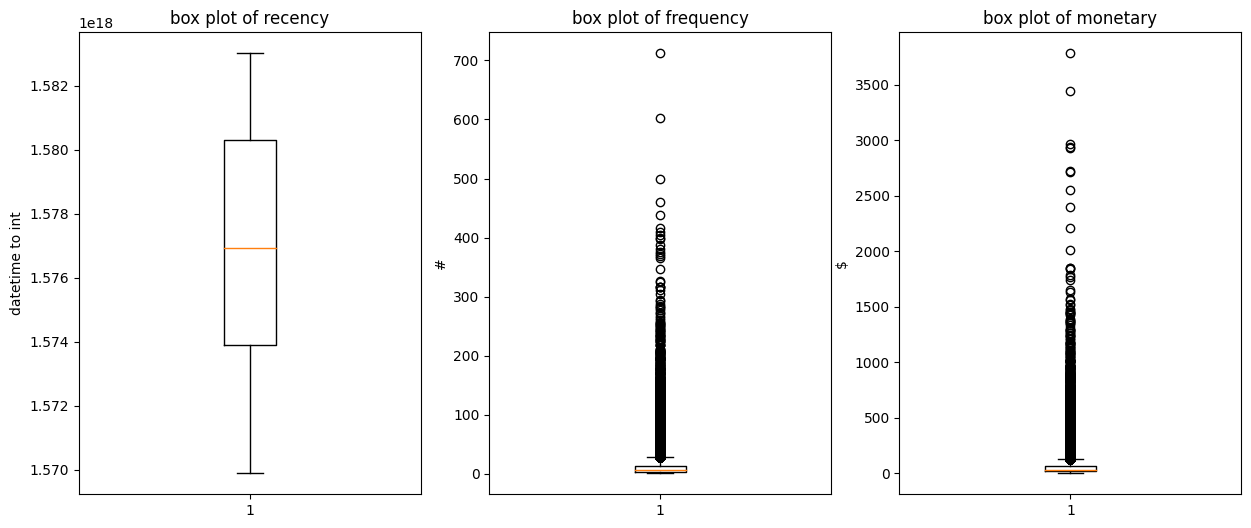

In [ ]:
# recency, frequncy, monetary를 boxplot으로 표현

col_list = ['recency', 'frequency', 'monetary']

fig, axes = plt.subplots(figsize = (15, 6), nrows=1, ncols=3)

for i in range(3) :

  col = col_list[i]
  ax = axes[i]

  if col == 'recency' :
    ax.boxplot(df_rfm[col].astype(int))
    ax.set_ylabel('datetime to int')

  else :
    ax.boxplot(df_rfm[col])

    if col == 'frequency' :
      ax.set_ylabel('#')
    elif col == 'monetary' :
      ax.set_ylabel('$')

  ax.set_title(f'box plot of {col}')

plt.show()

In [ ]:
df_rfm.iloc[:, 1:].describe(include='all')

,recency,frequency,monetary
count,110518,110518.000000,110518.000000
mean,2019-12-21 20:06:30.769558272+00:00,11.488699,57.473265
min,2019-10-01 00:10:30+00:00,1.000000,0.130000
25%,2019-11-16 13:59:17+00:00,3.000000,16.270000
50%,2019-12-21 14:05:55+00:00,6.000000,33.220000
75%,2020-01-29 14:38:37.249999872+00:00,13.000000,61.580000
max,2020-02-29 23:54:44+00:00,712.000000,3785.030000
std,NaN,17.941907,88.639681


recency는 정규분포에 가까운 형태를 하고 있지만, frequency와 monetary는 오른꼬리가 긴 극단적인 형태를 하고 있습니다. 사분위수마다 눈에 띄는 수치가 존재하기 때문에 해당 수치를 기준으로 고객을 분류할 수 있을 것으로 보입니다.

보통 recency의 기준을 사내에서 정한 이탈 기준으로 정할 수 있지만, 해당 데이터로 이탈 기준을 정할 수는 없습니다. 따라서, recency의 기준은 3개월 기준으로 나누겠습니다.

3개월인 이유는, 첨부된 조사 결과에서 2~3개월에 1회 화장품을 구입하는 비율이 42%일 정도로 비율이 높기 때문입니다.


1. 최근 접속일이 3개월 이내일 경우, RECENT
2. 최근 접속일이 3개월을 초과했을 경우, PAST


frequency의 기준은 frequency의 3사분위수를 기준으로 하겠습니다.

1. 활성 빈도가 13(3사분위수) 이상인 경우, HIGH
2. 활성 빈도가 13(3사분위수) 미만인 경우, LOW


monetary는 monetary의 1사분위수와 3사분위수로 iqr(3사분위수 - 1사분위수)을 계산하여 기준을 정하겠습니다.

1. 총 결제 금액이 3사분위수 + 1.5iqr 이상인 경우, HIGH
2. 총 결제 금액이 33.22(2사분위수) 이상이고 3사분위수 + 1.5iqr 미만인 경우, MIDDLE
3. 총 결제 금액이 33.22(2사분위수) 미만인 경우, LOW

위 기준으로 나눴을 때 고객을 12가지로 분류할 수 있습니다.

1. R = RECENT, F = HIGH, M = HIGH : 최고 충성 고객
2. R = RECENT, F = LOW, M = HIGH : 충성 고객
3. R = RECENT, F = HIGH, M = MIDDLE : 충성 고객
4. R = RECENT, F = HIGH, M = LOW : 일반 고객
5. R = RECENT, F = LOW, M = MIDDLE : 일반 고객
6. R = RECENT, F = LOW, M = LOW : 신규 고객
7. R = PAST, F = HIGH, M = HIGH : 관심 필요 최고 충성 고객
8. R = PAST, F = LOW, M = HIGH : 관심 필요 충성 고객
9. R = PAST, F = HIGH, M = MIDDLE : 관심 필요 충성 고객
10. R = PAST, F = HIGH, M = LOW : 이탈 위험 고객
11. R = PAST, F = LOW, M = MIDDLE : 이탈 위험 고객
12. R = PAST, F = LOW, M = LOW : 이탈 고객

12가지 경우의 수를 통해, 고객을 8개로 분류할 수 있었습니다.


'최고 충성 고객', '충성 고객', '일반 고객', '신규 고객', '관심 필요 최고 충성 고객', '관심 필요 충성 고객', '이탈 위험 고객', '이탈 고객'


해당 기준으로 고객을 분류해 보겠습니다.

In [ ]:
# rfm을 분류하기

df_des = df_rfm.iloc[:, 1:].describe(include='all')

# iqr 계산
iqr = df_des.loc['75%', 'monetary'] - df_des.loc['25%', 'monetary']

max_monetary = df_des.loc['75%', 'monetary'] + 1.5 * iqr

# 한 달을 28일로 두고, 3월 1일에서 84일 차이를 기준으로 recency를 나눔
df_rfm['class_recency'] = df_rfm.apply(lambda x : 'RECENT' if (pd.Timestamp('2020-03-01 00:00:00', tz='UTC') - x['recency']).days <= 84 else 'PAST', axis=1)
df_rfm['class_frequency'] = df_rfm['frequency'].apply(lambda x : 'HIGH' if x >= df_des.loc['75%', 'frequency'] else 'LOW')

def class_mon(row) :
  if row['monetary'] >= max_monetary :
    return 'HIGH'
  elif df_des.loc['50%', 'monetary'] <= row['monetary'] < max_monetary :
    return 'MIDDLE'
  else :
    return 'LOW'

df_rfm['class_monetary'] = df_rfm.apply(class_mon, axis=1)

df_rfm.head()

,user_id,recency,frequency,monetary,class_recency,class_frequency,class_monetary,segmentation
0,480463194,2020-02-28 05:55:53+00:00,712,1263.06,RECENT,HIGH,HIGH,최고 충성 고객
1,469299888,2020-02-23 00:59:54+00:00,602,2934.13,RECENT,HIGH,HIGH,최고 충성 고객
2,381816972,2020-02-26 04:50:46+00:00,499,2011.72,RECENT,HIGH,HIGH,최고 충성 고객
3,601469771,2020-02-14 22:08:38+00:00,461,1373.45,RECENT,HIGH,HIGH,최고 충성 고객
4,557790271,2019-11-18 02:06:26+00:00,438,2715.87,PAST,HIGH,HIGH,관심 필요 최고 충성 고객


In [ ]:
# 분류된 rfm을 통해 고객 분류

def segment_user(row) :
  if row['class_recency'] == 'RECENT' :
    if row['class_frequency'] == 'HIGH' and row['class_monetary'] == 'HIGH' :
      return '최고 충성 고객'
    elif (row['class_frequency'] == 'LOW' and row['class_monetary'] == 'HIGH') or (row['class_frequency'] == 'HIGH' and row['class_monetary'] == 'MIDDLE'):
      return '충성 고객'
    elif (row['class_frequency'] == 'HIGH' and row['class_monetary'] == 'LOW') or (row['class_frequency'] == 'LOW' and row['class_monetary'] == 'MIDDLE'):
      return '일반 고객'
    else :
      return '신규 고객'
  elif row['class_recency'] == 'PAST' :
    if row['class_frequency'] == 'HIGH' and row['class_monetary'] == 'HIGH' :
      return '관심 필요 최고 충성 고객'
    elif (row['class_frequency'] == 'LOW' and row['class_monetary'] == 'HIGH') or (row['class_frequency'] == 'HIGH' and row['class_monetary'] == 'MIDDLE'):
      return '관심 필요 충성 고객'
    elif (row['class_frequency'] == 'HIGH' and row['class_monetary'] == 'LOW') or (row['class_frequency'] == 'LOW' and row['class_monetary'] == 'MIDDLE'):
      return '이탈 위험 고객'
    else :
      return '이탈 고객'

df_rfm['segmentation'] = df_rfm.apply(segment_user, axis=1)

df_rfm.head()

,user_id,recency,frequency,monetary,class_recency,class_frequency,class_monetary,segmentation
0,480463194,2020-02-28 05:55:53+00:00,712,1263.06,RECENT,HIGH,HIGH,최고 충성 고객
1,469299888,2020-02-23 00:59:54+00:00,602,2934.13,RECENT,HIGH,HIGH,최고 충성 고객
2,381816972,2020-02-26 04:50:46+00:00,499,2011.72,RECENT,HIGH,HIGH,최고 충성 고객
3,601469771,2020-02-14 22:08:38+00:00,461,1373.45,RECENT,HIGH,HIGH,최고 충성 고객
4,557790271,2019-11-18 02:06:26+00:00,438,2715.87,PAST,HIGH,HIGH,관심 필요 최고 충성 고객


In [ ]:
# 저장
df_rfm.to_csv(dir_path+'rfm.csv',index=False, header=True)

In [ ]:
df_rfm = csv_to_df('rfm.csv', col_event_time='recency')

In [ ]:
# rfm group by

df_rfm_gr = df_rfm.groupby('segmentation').agg({'user_id' : 'count', 'monetary':'sum'}).reset_index(drop=False).sort_values('monetary', ascending=False)

df_rfm_gr

,segmentation,user_id,monetary
6,최고 충성 고객,7151,1970019.19
7,충성 고객,11680,964990.57
5,일반 고객,16684,882717.13
4,이탈 위험 고객,12232,630063.58
1,관심 필요 충성 고객,7190,558628.08
2,신규 고객,30129,517048.16
0,관심 필요 최고 충성 고객,1891,423144.26
3,이탈 고객,23561,405219.32


In [ ]:
sum_sales = df_rfm_gr['monetary'].sum()

df_rfm_gr['cum_sum'] = df_rfm_gr['monetary'].cumsum()

df_rfm_gr['ratio'] = df_rfm_gr['cum_sum'] / sum_sales * 100

df_rfm_gr['ratio_diff'] = (df_rfm_gr['monetary'].diff() * -1).fillna(0) / sum_sales * 100

df_rfm_gr

,segmentation,user_id,monetary,cum_sum,ratio,ratio_diff
6,최고 충성 고객,7151,1970019.19,1970019.19,31.014985,0.000000
7,충성 고객,11680,964990.57,2935009.76,46.207308,15.822662
5,일반 고객,16684,882717.13,3817726.89,60.104359,1.295271
4,이탈 위험 고객,12232,630063.58,4447790.47,70.023761,3.977650
1,관심 필요 충성 고객,7190,558628.08,5006418.55,78.818519,1.124644
2,신규 고객,30129,517048.16,5523466.71,86.958663,0.654613
0,관심 필요 최고 충성 고객,1891,423144.26,5946610.97,93.620432,1.478375
3,이탈 고객,23561,405219.32,6351830.29,100.000000,0.282201


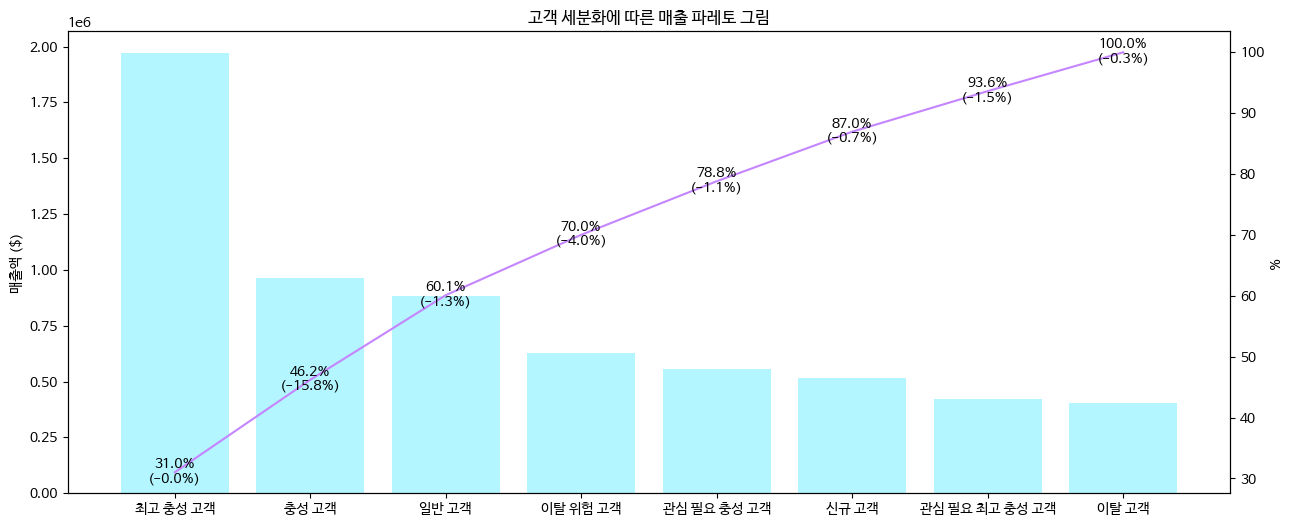

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))

plt.rcParams['font.family'] = 'NanumBarunGothic'

ax1.bar(df_rfm_gr['segmentation'], df_rfm_gr['monetary'], color='#B3F6FF')
ax1.set_title('고객 세분화에 따른 매출 파레토 그림')
ax1.set_ylabel('매출액 ($)')

ax2 = ax1.twinx()
ax2.plot(df_rfm_gr['segmentation'], df_rfm_gr['ratio'], color='#C485FF')
ax2.set_ylabel('%')

for i in range(df_rfm_gr['segmentation'].shape[0]):
    ax2.text(df_rfm_gr['segmentation'][i], df_rfm_gr['ratio'][i], str(round(df_rfm_gr['ratio'][i],1))+'%', ha='center', va='bottom')
    ax2.text(df_rfm_gr['segmentation'][i], df_rfm_gr['ratio'][i], '(-'+str(round(df_rfm_gr['ratio_diff'][i],1))+'%)', ha='center', va='top')

plt.show()

## 세분화 기준2

In [ ]:
df_rfm2 = df_rfm[['user_id','recency', 'frequency', 'monetary']]

df_rfm2.info()
df_rfm2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110518 entries, 0 to 110517
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   user_id    110518 non-null  int64              
 1   recency    110518 non-null  datetime64[ns, UTC]
 2   frequency  110518 non-null  int64              
 3   monetary   110518 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2)
memory usage: 3.4 MB


,user_id,recency,frequency,monetary
0,480463194,2020-02-28 05:55:53+00:00,712,1263.06
1,469299888,2020-02-23 00:59:54+00:00,602,2934.13
2,381816972,2020-02-26 04:50:46+00:00,499,2011.72
3,601469771,2020-02-14 22:08:38+00:00,461,1373.45
4,557790271,2019-11-18 02:06:26+00:00,438,2715.87


In [ ]:
df_rfm2['recency_diff'] = (pd.Timestamp('2020-03-01 00:00:00', tz='UTC') - df_rfm2['recency']).dt.days

df_rfm2.head(10)

,user_id,recency,frequency,monetary,recency_diff
0,480463194,2020-02-28 05:55:53+00:00,712,1263.06,1
1,469299888,2020-02-23 00:59:54+00:00,602,2934.13,6
2,381816972,2020-02-26 04:50:46+00:00,499,2011.72,3
3,601469771,2020-02-14 22:08:38+00:00,461,1373.45,15
4,557790271,2019-11-18 02:06:26+00:00,438,2715.87,103
5,473313149,2020-02-27 17:18:58+00:00,416,1233.48,2
6,566439116,2020-02-13 14:28:17+00:00,409,925.13,16
7,247216055,2020-02-25 12:20:45+00:00,405,2720.80,4
8,431950134,2020-02-11 21:52:15+00:00,400,2400.43,18
9,575709540,2019-12-17 13:46:22+00:00,398,1526.73,74


In [ ]:
from sklearn.preprocessing import RobustScaler

r_scale = RobustScaler()

r_scale.fit(df_rfm2.iloc[:,2:])

X_train = r_scale.transform(df_rfm2.iloc[:,2:])

X_train

array([[70.6       , 27.14279409, -0.93243243],
       [59.6       , 64.0236151 , -0.86486486],
       [49.3       , 43.66585743, -0.90540541],
       ...,
       [-0.5       , -0.73030236,  0.7027027 ],
       [-0.5       , -0.73030236,  1.01351351],
       [-0.5       , -0.73030236,  1.08108108]])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(max_iter=1000, random_state=26)

kmeans.fit(X_train)

KMeans(max_iter=1000, random_state=26)

In [ ]:
df_rfm2['cluster'] = kmeans.labels_.astype(str)

df_rfm2.tail(10)

,user_id,recency,frequency,monetary,recency_diff,cluster
110508,582009229,2019-12-07 09:34:41+00:00,1,0.13,84,4
110509,578695603,2019-11-29 05:45:09+00:00,1,0.13,92,4
110510,572369923,2019-11-16 21:52:23+00:00,1,0.13,105,4
110511,562258191,2019-11-07 08:05:59+00:00,1,0.13,114,4
110512,568120292,2019-11-06 09:34:22+00:00,1,0.13,115,4
110513,567841341,2019-11-05 13:55:33+00:00,1,0.13,116,4
110514,566523239,2019-11-01 18:02:41+00:00,1,0.13,120,4
110515,563967402,2019-10-30 09:39:28+00:00,1,0.13,122,4
110516,557657597,2019-10-07 18:40:59+00:00,1,0.13,145,4
110517,555676074,2019-10-02 12:01:09+00:00,1,0.13,150,4


In [ ]:
df_rfm2_gr = df_rfm2.groupby('cluster').agg({'user_id' : 'count', 'monetary':'sum'}).reset_index(drop=False).sort_values('monetary', ascending=False)

sum_sales2 = df_rfm2_gr['monetary'].sum()

df_rfm2_gr['cum_sum'] = df_rfm2_gr['monetary'].cumsum()

df_rfm2_gr['ratio'] = df_rfm2_gr['cum_sum'] / sum_sales2 * 100

df_rfm2_gr['ratio_diff'] = (df_rfm2_gr['monetary'].diff() * -1).fillna(0) / sum_sales2 * 100

df_rfm2_gr

,cluster,user_id,monetary,cum_sum,ratio,ratio_diff
3,3,20971,1631256.24,1631256.24,25.681672,0.000000
6,6,7336,1204716.75,2835972.99,44.648123,6.715222
4,4,41315,1078288.92,3914261.91,61.624158,1.990416
0,0,37232,990045.71,4904307.62,77.210936,1.389256
1,1,2663,803138.53,5707446.15,89.855142,2.942572
7,7,859,472618.88,6180065.03,97.295815,5.203534
2,2,130,139810.62,6319875.65,99.496922,5.239565
5,5,12,31954.64,6351830.29,100.000000,1.698030


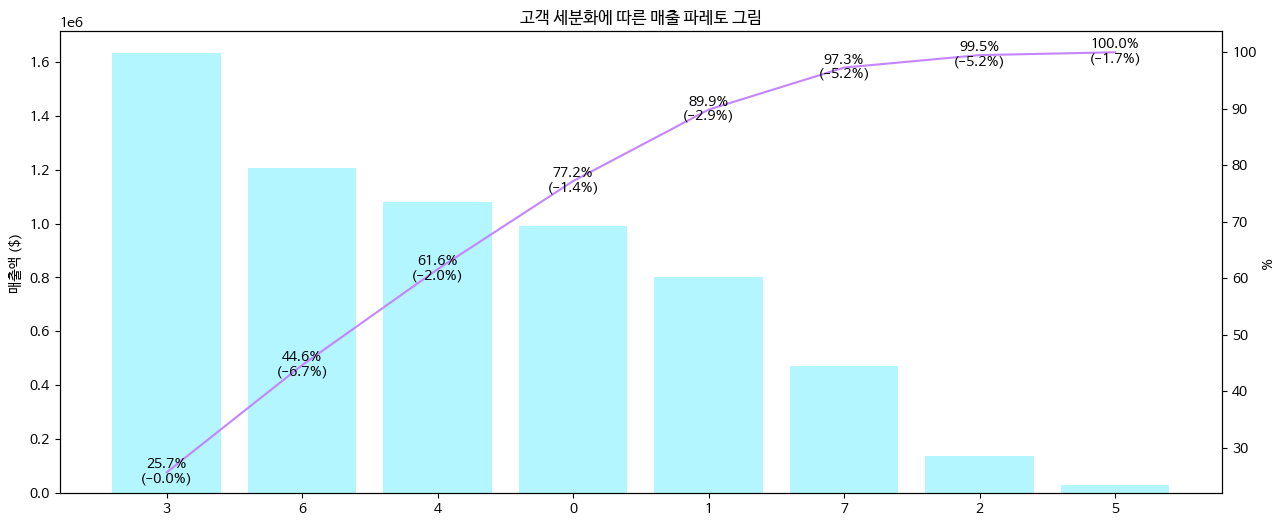

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))

plt.rcParams['font.family'] = 'NanumBarunGothic'

ax1.bar(df_rfm2_gr['cluster'], df_rfm2_gr['monetary'], color='#B3F6FF')
ax1.set_title('고객 세분화에 따른 매출 파레토 그림')
ax1.set_ylabel('매출액 ($)')

ax2 = ax1.twinx()
ax2.plot(df_rfm2_gr['cluster'], df_rfm2_gr['ratio'], color='#C485FF')
ax2.set_ylabel('%')

for i in range(df_rfm2_gr['cluster'].shape[0]):
    ax2.text(df_rfm2_gr['cluster'][i], df_rfm2_gr['ratio'][i], str(round(df_rfm2_gr['ratio'][i],1))+'%', ha='center', va='bottom')
    ax2.text(df_rfm2_gr['cluster'][i], df_rfm2_gr['ratio'][i], '(-'+str(round(df_rfm2_gr['ratio_diff'][i],1))+'%)', ha='center', va='top')

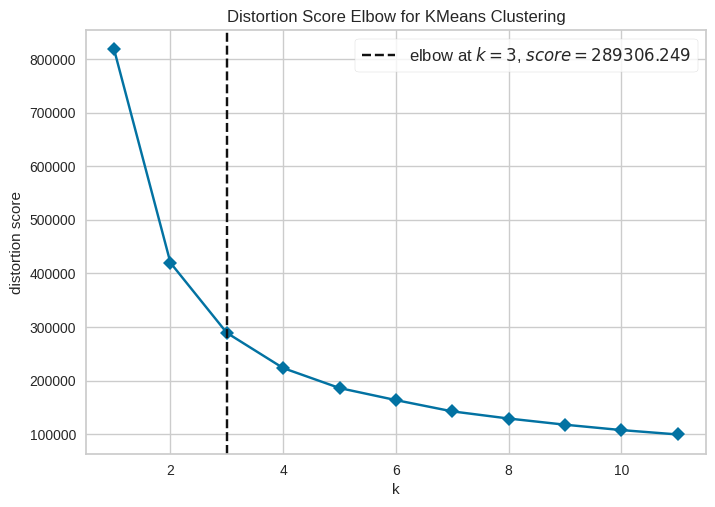

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# elbow method에서 비용함수가 급격히 줄어드는 k 찾기

from yellowbrick.cluster import KElbowVisualizer

k=0

kmeans = KMeans(n_clusters=k, random_state=26)

visualizer = KElbowVisualizer(kmeans, k=(1,12), timings=False)

visualizer.fit(X_train)
visualizer.show()

k=3일 때부터 비용 함수가 급격히 감소하기 때문에 군집은 3으로 나누는 것이 합당하나, 고객 세분화를 3개의 군집으로 나누는 것은 적합하지 않다고 생각합니다(고객의 서비스 이용 특성을 3가지로 나누는 것은 적합하지 않다고 생각됨).

In [ ]:
# 실루엣 계수로 찾기
from sklearn.metrics import silhouette_score

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=26).fit(X_train)
    silhouette_avg = silhouette_score(X_train, kmeans.labels_)
    print(f'cluster : {k} // silhouette index {silhouette_avg}')

cluster : 2 // silhouette index 0.7872550662319724
cluster : 3 // silhouette index 0.6551884792548721
cluster : 4 // silhouette index 0.5685331191800215
cluster : 5 // silhouette index 0.4716960015948851
cluster : 6 // silhouette index 0.41203076733370236
cluster : 7 // silhouette index 0.3325260195410557
cluster : 8 // silhouette index 0.33346292507591235
cluster : 9 // silhouette index 0.3386224883311785
cluster : 10 // silhouette index 0.3347089984395965
cluster : 11 // silhouette index 0.336696553370974


실루엣 계수가 1에 가깝고, 적어도 0.5보다 클수록 정확히 분류(유의함)됐다고 볼 수 있으나, 군집을 4개 이상으로 분류할 수록 실루엣 계수가 떨어지기에 적절하게 분류됐다고 볼 수 없습니다.

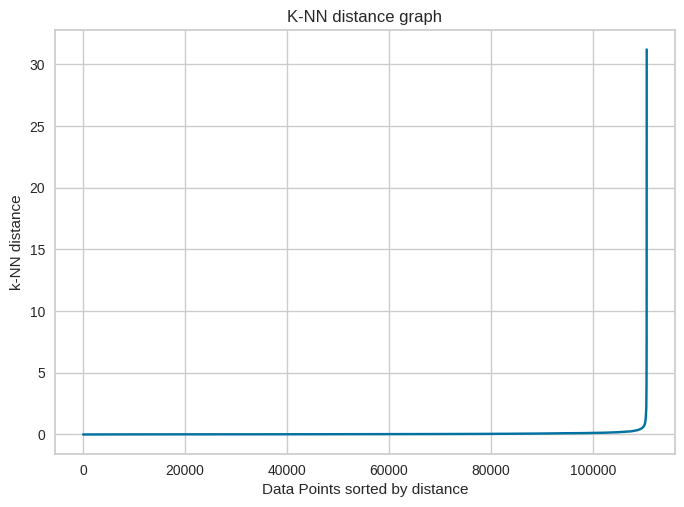

In [ ]:
# dbscan
# knn으로 eps 값 찾기

from sklearn.neighbors import NearestNeighbors

# K-NN 거리 계산
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_train)
distances, indices = nbrs.kneighbors(X_train)

# k번째 이웃까지의 거리 정렬
distances = np.sort(distances[:, k-1], axis=0)

# K-NN 거리 그래프 그리기
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-NN distance')
plt.title('K-NN distance graph')
plt.show()

거리가 1이상이 될 때 급격히 증가하는 것으로 보이므로, eps를 1로 설정하겠습니다.

In [ ]:
arr_eps = distances[np.where(distances > 1)][0]

print(arr_eps)

1.0031455166748087


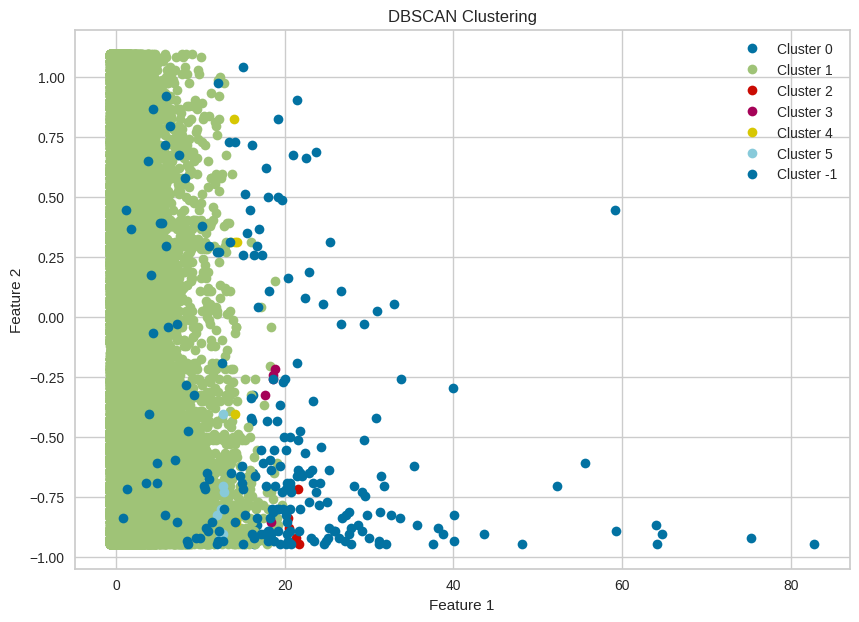

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링 수행
db = DBSCAN(eps=arr_eps, min_samples=k).fit(X_train)

# # 결과 시각화
labels = db.labels_
# unique_labels = set(labels)

# plt.figure(figsize=(10, 7))
# for label in unique_labels:
#     label_mask = (labels == label)
#     plt.plot(X_train[label_mask][:, 1], X_train[label_mask][:, 2], 'o', label=f'Cluster {label}')
# plt.title('DBSCAN Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

In [ ]:
df_rfm2['cluster'] = labels

df_rfm2.head(5)

,user_id,recency,frequency,monetary,recency_diff,cluster
0,480463194,2020-02-28 05:55:53+00:00,712,1263.06,1,-1
1,469299888,2020-02-23 00:59:54+00:00,602,2934.13,6,-1
2,381816972,2020-02-26 04:50:46+00:00,499,2011.72,3,-1
3,601469771,2020-02-14 22:08:38+00:00,461,1373.45,15,-1
4,557790271,2019-11-18 02:06:26+00:00,438,2715.87,103,-1


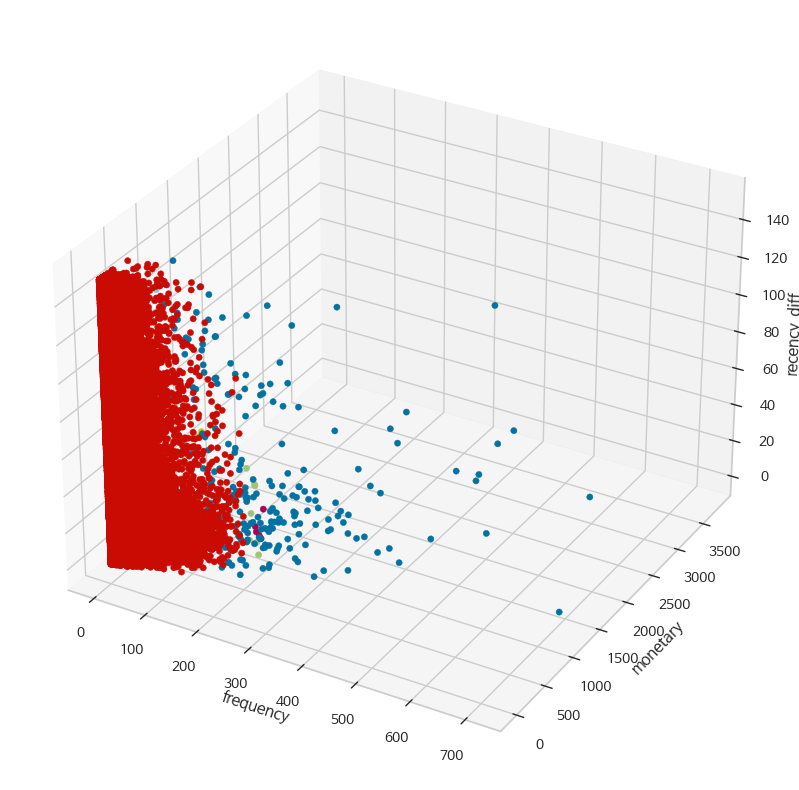

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))

plt.rcParams['font.family'] = 'NanumBarunGothic'

ax = fig.add_subplot(111, projection='3d')

# 3D 산점도
# scatter = ax.scatter(df_rfm2['frequency'], df_rfm2['monetary'], df_rfm2['recency_diff'], c=df_rfm2['cluster'], alpha=1)

for cluster in df_rfm2['cluster'].unique():
    cluster_data = df_rfm2[df_rfm2['cluster'] == cluster]
    ax.scatter(cluster_data['frequency'], cluster_data['monetary'], cluster_data['recency_diff'],
                alpha=1, label=f'Cluster {cluster}')

# 축 레이블 설정
ax.set_xlabel('frequency')
ax.set_ylabel('monetary')
ax.set_zlabel('recency_diff')

plt.show()

In [ ]:
df_rfm2.groupby('cluster').agg({'user_id' : 'count', 'monetary':'sum'}).reset_index(drop=False).sort_values('monetary', ascending=False)

,cluster,user_id,monetary
2,1,110268,6111176.37
0,-1,220,217747.26
1,0,7,5369.89
3,2,5,4954.04
4,3,5,4345.72
6,5,7,4209.13
5,4,6,4027.88


DBSCAN으로 고객을 세분화했을 때, cluster 1에 해당하는 사용자가 압도적으로 많으므로(전체 고객의 99%), 올바르게 분류됐다고 볼 수 없습니다. 따라서 KMeans와 DBSCAN으로 고객 세분화를 하지 않고, 위에서 분류했던 방법으로 고객을 분류하는 것이 적합해 보입니다.

## 세분화별 전환율 차이?

In [3]:
df = csv_to_df('ecommerce_data_2019-2020.csv')

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [4]:
df_rfm = csv_to_df('rfm.csv', col_event_time='recency')

df_rfm.head()

,user_id,recency,frequency,monetary,class_recency,class_frequency,class_monetary,segmentation
0,480463194,2020-02-28 05:55:53+00:00,712,1263.06,RECENT,HIGH,HIGH,최고 충성 고객
1,469299888,2020-02-23 00:59:54+00:00,602,2934.13,RECENT,HIGH,HIGH,최고 충성 고객
2,381816972,2020-02-26 04:50:46+00:00,499,2011.72,RECENT,HIGH,HIGH,최고 충성 고객
3,601469771,2020-02-14 22:08:38+00:00,461,1373.45,RECENT,HIGH,HIGH,최고 충성 고객
4,557790271,2019-11-18 02:06:26+00:00,438,2715.87,PAST,HIGH,HIGH,관심 필요 최고 충성 고객


In [5]:
df_ver_mer = df[['event_time', 'event_type', 'product_id', 'user_id', 'user_session']]

df_rfm_ver_mer = df_rfm[['user_id', 'segmentation']]

df_mer = pd.merge(left = df_ver_mer, right = df_rfm_ver_mer, on = 'user_id', how='inner')

df_mer.head()

,event_time,event_type,product_id,user_id,user_session,segmentation
0,2019-10-01 00:00:00+00:00,cart,5773203,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,관심 필요 충성 고객
1,2019-10-01 00:00:03+00:00,cart,5773353,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,관심 필요 충성 고객
2,2019-10-01 00:00:07+00:00,cart,5723490,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,관심 필요 충성 고객
3,2019-10-01 00:02:32+00:00,cart,5857283,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,관심 필요 충성 고객
4,2019-10-01 00:02:40+00:00,cart,5723523,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,관심 필요 충성 고객


In [9]:
df_mer_gr = df_mer.groupby(['segmentation', 'event_type'])['user_session'].count().reset_index(level=[0,1], drop=False)

df_mer_gr = df_mer_gr.pivot(index = 'segmentation', columns='event_type', values='user_session')[['view', 'purchase']].sort_values('purchase', ascending=False)

df_mer_gr

event_type,view,purchase
segmentation,,
최고 충성 고객,1014083,395734
충성 고객,855930,241657
관심 필요 충성 고객,392407,142571
일반 고객,503214,121082
신규 고객,553046,120503
이탈 고객,416867,95168
이탈 위험 고객,333181,88877
관심 필요 최고 충성 고객,145892,81415


In [10]:
# 카이제곱 검정을 통한 독립성 검정

chi2 = chi2_contingency(observed=df_mer_gr)

# 유의수준 5%에서

if chi2[1] < 0.05 :
  print(f'유의수준 5%에서 p-value가 {chi2[1]}이므로 귀무가설 기각, 고객 분류와 view / purchase 이벤트 간의 상관성이 있을 수도 있습니다.')
else :
  print(f'유의수준 5%에서 p-value가 {chi2[1]}이므로 귀무가설 채택, 고객 분류와 view / purchase 이벤트는 독립적입니다.')

유의수준 5%에서 p-value가 0.0이므로 귀무가설 기각, 고객 분류와 view / purchase 이벤트 간의 상관성이 있을 수도 있습니다.


In [12]:
df_mer_gr['purchase / view'] = df_mer_gr['purchase'] / df_mer_gr['view'] * 100

df_mer_gr.head()

event_type,view,purchase,purchase / view
segmentation,,,
최고 충성 고객,1014083,395734,39.023827
충성 고객,855930,241657,28.233267
관심 필요 충성 고객,392407,142571,36.332430
일반 고객,503214,121082,24.061731
신규 고객,553046,120503,21.788965


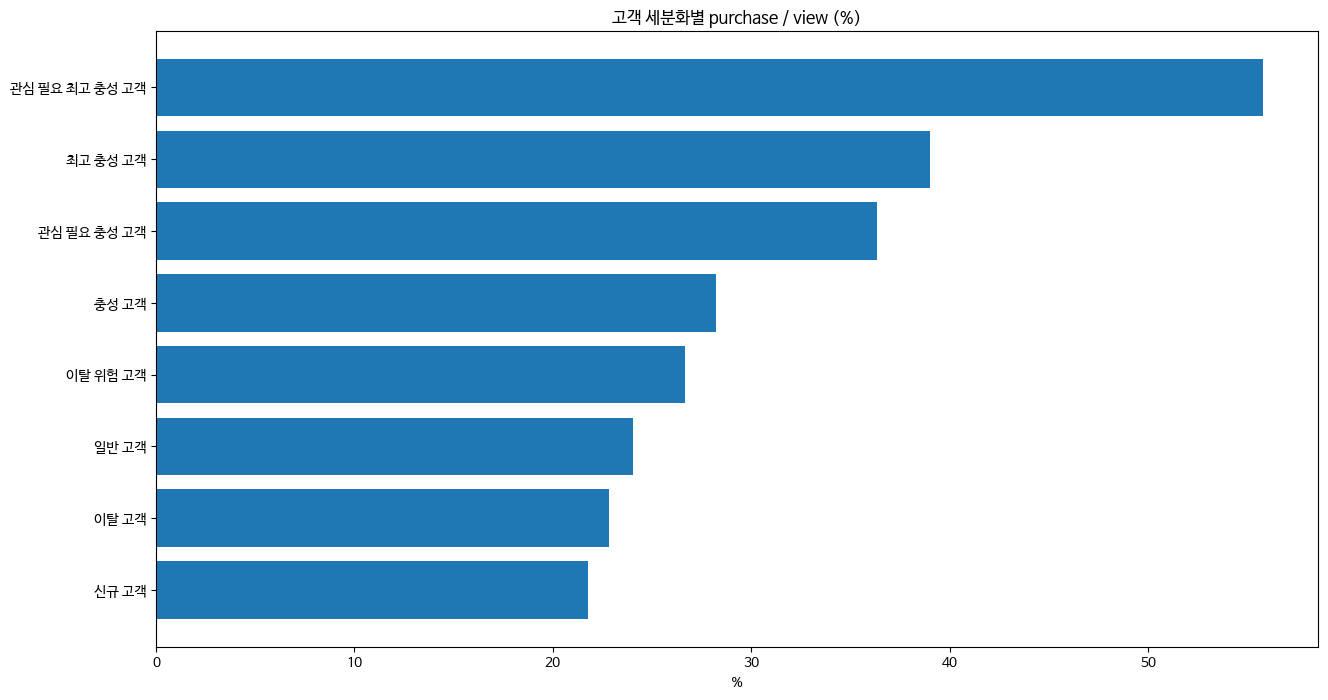

In [19]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

fig = plt.figure(figsize=(15,8))

plt.barh(y=df_mer_gr.sort_values(by='purchase / view',ascending=True).index, width = df_mer_gr['purchase / view'].sort_values(ascending=True))
plt.title('고객 세분화별 purchase / view (%)')
plt.xlabel('%')

plt.show()

In [48]:
df_need_att = df_mer[(df_mer['segmentation'] == '관심 필요 최고 충성 고객') & (df_mer['event_type'] == 'purchase')][['event_time', 'user_id', 'segmentation']]
print(df_need_att.shape)

df_need_att['ymd'] = df_need_att['event_time'].dt.strftime('%Y-%m-%d')

df_need_att = df_need_att.groupby('user_id')['ymd'].max().reset_index(drop=False)
print(df_need_att.shape)

(81415, 3)
(1891, 2)


In [49]:
import matplotlib.dates as mdates

# datetime 데이터를 숫자로 변환
df_need_att['ymd_num'] = mdates.date2num(df_need_att['ymd'])

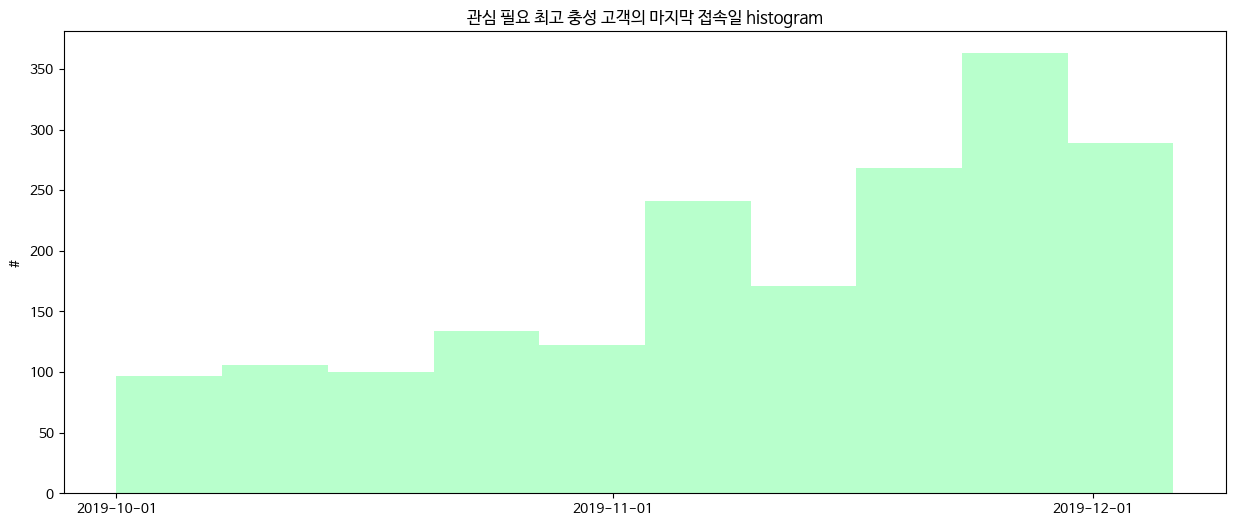

In [54]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=1)

plt.rcParams['font.family'] = 'NanumBarunGothic'

# hist 함수를 사용하여 히스토그램 그리기
ax.hist(df_need_att['ymd_num'], bins=10, alpha=1, color='#B8FFCC')

# x축을 datetime 형식으로 설정
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_title('관심 필요 최고 충성 고객의 마지막 접속일 histogram')
ax.set_ylabel('#')

plt.show()

# 추천 시스템

저장하고 출력하는데 시간이 오래 걸려 11월 데이터로만 추천 시스템 구현하고자 합니다.

In [ ]:
# 11월

df_con = csv_to_df('2019-Nov.csv')

In [ ]:
# 구매 전환된 사용자의 id 추출

df_con[df_con['event_type']=='purchase']['user_id'].drop_duplicates(keep='first').to_csv(dir_path + 'id_purchase.csv', index=True, header=True)

In [ ]:
# product_id와 카테고리 추출

df_con[['product_id', 'category_code']].drop_duplicates(keep='first').to_csv(dir_path + 'product_category.csv', header=True, index=False)

## matrix

In [ ]:
def matrix_recommend(dataframe) :
  dataframe = dataframe[dataframe['event_type']=='purchase'][['product_id', 'user_id', 'event_time']]
  df_gb = dataframe.groupby(['user_id', 'product_id'])['event_time'].count()
  print('groupby 성공')
  del dataframe  # 메모리 잡아먹는다고 del

  df_gb = df_gb.reset_index(level=[0,1], drop=False)
  df_pv = df_gb.pivot_table(index='user_id', columns='product_id', values='event_time')
  print('pivot 성공')
  del df_gb
  df_pv.replace({np.nan : 0}, inplace=True)
  print('replace 성공')
  df_pv = df_pv.where(df_pv <= 1, 1)

  return df_pv

In [ ]:
mat2 = matrix_recommend(dataframe=df_con)

print(mat2.shape)
mat2.head(10)

groupby 성공
pivot 성공
replace 성공
(52523, 33172)


product_id,3762,3763,3774,3776,3806,3928,3929,3936,3945,3959,...,5909057,5909067,5909070,5909231,5909232,5909233,5909237,5909238,5909240,5909245
user_id,,,,,,,,,,,,,,,,,,,,,
9794320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10079204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10280338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15781728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19762782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28048440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29025780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31229488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33535391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mat2.to_csv(dir_path + 'user_product_mat.csv', header=True, index=True)

## 자카드거리와 협업 필터링

In [ ]:
matrix = pd.read_csv(dir_path + 'user_product_mat.csv')

matrix.head()

,user_id,3762,3763,3774,3776,3806,3928,3929,3936,3945,...,5909057,5909067,5909070,5909231,5909232,5909233,5909237,5909238,5909240,5909245
0,9794320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10079204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10280338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15781728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19762782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
matrix.set_index(keys='user_id', inplace=True)

matrix.head()

,3762,3763,3774,3776,3806,3928,3929,3936,3945,3959,...,5909057,5909067,5909070,5909231,5909232,5909233,5909237,5909238,5909240,5909245
user_id,,,,,,,,,,,,,,,,,,,,,
9794320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10079204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10280338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15781728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19762782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 사용자 간 자카드 유사도 계산
def jaccard_similarity(R):
  start_time = time.time()
  print('calculating...')
  num_users = R.shape[0]
  similarity = np.zeros((num_users, num_users))
  # cnt = 0
  for i in tqdm(range(num_users)):
    for j in range(num_users):
      if i != j:
        similarity[i, j] = jaccard_score(R.iloc[i], R.iloc[j])

  end_time = time.time()
  print('finished!')
  print('operating time : ', round((end_time - start_time) / 60, 3),'min')
  return similarity

# # SVD를 사용하여 행렬 분해
# def svd_decomposition(R, n_components=2):
#     svd = TruncatedSVD(n_components=n_components)
#     U = svd.fit_transform(R)
#     Sigma = svd.singular_values_
#     VT = svd.components_
#     return U, Sigma, VT

def predict_scores_for_user(R, similarity, user_id):
    num_users, num_items = R.shape
    predictions = np.zeros(num_items)

    for i in range(num_items):
        if R[user_id, i] == 0:  # 해당 사용자가 평가하지 않은 아이템에 대해서만 예측
            weighted_sum = 0
            sum_of_weights = 0
            for v in range(num_users):
                if R[v, i] > 0:  # 다른 사용자가 해당 아이템을 평가한 경우
                    weighted_sum += similarity[user_id, v] * R[v, i]
                    sum_of_weights += similarity[user_id, v]
            if sum_of_weights > 0:
                predictions[i] = weighted_sum / sum_of_weights
    return predictions

In [ ]:
# similarity_jac = jaccard_similarity(R = matrix)

# similarity_jac

자카드 유사도를 이용해 협업 필터링을 시도하려고 했지만 10분이 넘도록 반복문의 첫번째도 완료하지 못했습니다(50000번 실행해야 함). 따라서 다른 방법을 고민해야 하겠습니다.

## interaction_score 계산을 통한 협업 필터링

In [ ]:
# view의 quartile?

product_funnel = df_con.groupby(['product_id', 'event_type'])['user_session'].count()
product_funnel = product_funnel.reset_index(level=[0,1], drop=False)
product_funnel = product_funnel.pivot_table(index='product_id', columns='event_type', values='user_session', aggfunc='mean')

under_10 = product_funnel[product_funnel['view'] <= 5].index

product_funnel.describe(include='all')

event_type,cart,purchase,remove_from_cart,view
count,35699.000000,28954.000000,35059.000000,42383.000000
mean,36.727808,11.135491,26.393736,48.984805
std,121.913528,32.564256,60.096242,182.095606
min,0.000000,1.000000,0.000000,1.000000
25%,5.000000,2.000000,4.000000,5.000000
50%,12.000000,4.000000,10.000000,15.000000
75%,32.000000,10.000000,26.000000,40.000000
max,7445.000000,2138.000000,2959.000000,18814.000000


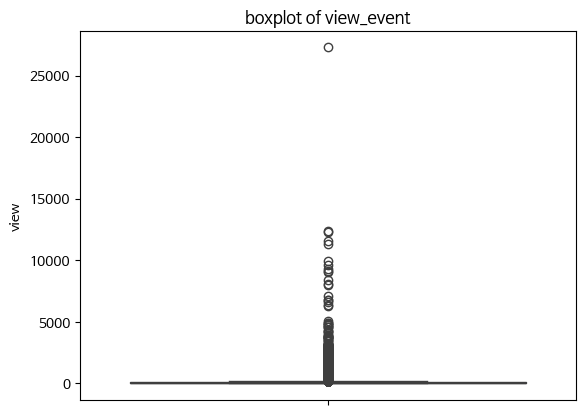

In [ ]:
plt.figsize=(6,6)
sns.boxplot(data=product_funnel, y = product_funnel['view'])
plt.title('boxplot of view_event')
plt.show()

In [ ]:
# view 이벤트가 25%이하일 때 purchase 이벤트 발생?
under_25 = product_funnel[product_funnel['view'] <= product_funnel.describe(include='all').loc['25%', 'view']]
under_25.replace({np.nan : 0}, inplace=True)

under_25.describe()

event_type,cart,purchase,remove_from_cart,view
count,10758.000000,10758.000000,10758.000000,10758.000000
mean,2.145473,0.452872,1.952779,2.582264
std,4.052405,1.068083,3.694955,1.422560
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,2.000000
75%,3.000000,1.000000,3.000000,4.000000
max,98.000000,22.000000,89.000000,5.000000


몇몇 인기 제품을 제외하고는 view 이벤트 발생이 극도로 적은 상품이 많습니다.

view 이벤트가 적은 제품은 purchase 이벤트 발생도 적은 것을 확인할 수 있습니다.

따라서 long tail을 고려하더라도 view 이벤트가 적은 제품을 추천하는 것은 구매로 이어지지 않을 것이라고 생각되기 때문에 view 이벤트 발생 수가 전체 view 이벤트 발생 수의 25%이하인 제품은 추천에서 제외하는 방향으로 진행하겠습니다.

유저별로 제품 전환율을 interaction score로 사용할 수 있는지 확인해 보겠습니다.

In [ ]:
funnel = df_con.groupby(['user_id','product_id', 'event_type'])['user_session'].count() # 사용자별, 제품 id별, 이벤트 타입별 grouping을 통한 count
funnel = funnel.reset_index(level=list(range(3)), drop=False)
funnel = funnel.pivot(index=['user_id', 'product_id'], columns='event_type', values='user_session')  # 단계별 퍼널 전환율을 구하기 위한 pivot
funnel.replace({np.nan : 0}, inplace=True)
funnel = funnel.reset_index(level=1, drop=False)

# 단계별 전환율 계산
funnel['cart_per_view'] = funnel.apply(lambda d : d['cart'] / d['view'] if d['view'] != 0 else 0, axis=1)
funnel['remove_per_cart'] = funnel.apply(lambda d : d['remove_from_cart'] / d['cart'] if d['cart'] != 0 else 0, axis=1)
funnel['purchase_per_view'] = funnel.apply(lambda d : d['purchase'] / d['view'] if d['view'] != 0 else 0, axis=1)

funnel[['cart_per_view', 'remove_per_cart', 'purchase_per_view']].describe()

event_type,cart_per_view,remove_per_cart,purchase_per_view
count,2.389836e+06,2.389836e+06,2.389836e+06
mean,1.406469e-01,2.552116e-01,3.745752e-02
std,5.638209e-01,6.684063e-01,1.822030e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,2.460000e+02,1.830000e+02,4.000000e+00


In [ ]:
funnel[funnel['purchase_per_view'] >= 3]

event_type,product_id,cart,purchase,remove_from_cart,view,cart_per_view,remove_per_cart,purchase_per_view
user_id,,,,,,,,
334892334,5856951,3.0,3.0,1.0,1.0,3.0,0.333333,3.0
388863338,5732025,1.0,3.0,0.0,1.0,1.0,0.000000,3.0
395143571,5751383,3.0,3.0,0.0,1.0,3.0,0.000000,3.0
404176468,5849718,4.0,3.0,0.0,1.0,4.0,0.000000,3.0
406215147,5747405,3.0,3.0,1.0,1.0,3.0,0.333333,3.0
...,...,...,...,...,...,...,...,...
573381486,5569526,6.0,3.0,0.0,1.0,6.0,0.000000,3.0
575556628,5848119,3.0,3.0,0.0,1.0,3.0,0.000000,3.0
576045848,5825956,3.0,3.0,0.0,1.0,3.0,0.000000,3.0


view 이벤트는 한번이지만, cart와 purchase 이벤트가 여러 번인 경우가 발생합니다.

하나의 제품을 여러 개 구매하면 cart 이벤트와 purchase 이벤트가 여러번 발생하는 것으로 추측됩니다. 전환율 자체가 1보다 커지는 경우가 발생하므로, 전환율을 점수의 기준으로 삼는 것은 합리적이지 않다고 판단됩니다.

각 이벤트 발생 횟수의 총합을 구한 후, 총합에 대한 각 이벤트의 비율을 구해보겠습니다.

In [ ]:
funnel['sum'] = funnel[['cart', 'purchase', 'remove_from_cart', 'view']].sum(axis=1)

funnel['rate_view'] = funnel.apply(lambda d : d['view'] / d['sum'] if d['sum'] != 0 else 0, axis=1)
funnel['rate_cart'] = funnel.apply(lambda d : d['cart'] / d['sum'] if d['sum'] != 0 else 0, axis=1)
funnel['rate_remove'] = funnel.apply(lambda d : d['remove_from_cart'] / d['sum'] if d['sum'] != 0 else 0, axis=1)
funnel['rate_purchase'] = funnel.apply(lambda d : d['purchase'] / d['sum'] if d['sum'] != 0 else 0, axis=1)

funnel[['rate_view','rate_cart', 'rate_remove', 'rate_purchase']].describe()

event_type,rate_view,rate_cart,rate_remove,rate_purchase
count,2.389836e+06,2.389836e+06,2.389836e+06,2.389836e+06
mean,5.484511e-01,2.532154e-01,1.411401e-01,5.709723e-02
std,4.616004e-01,3.409369e-01,2.768479e-01,1.660983e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


유저별, 제품별 이벤트 비율로 계산했을 때 최대값이 1을 초과하지 않으므로 해당 비율을 interaction score의 기준으로 사용하겠습니다.

In [ ]:
def conversion(df, rm_id, score : float = 0.01) :
  start_time = time.time()
  print('doing conversion...')
  ###########################
  funnel = df.groupby(['user_id','product_id', 'event_type'])['user_session'].count() # 사용자별, 제품 id별, 이벤트 타입별 grouping을 통한 count
  funnel = funnel.reset_index(level=list(range(3)), drop=False)
  funnel = funnel.pivot(index=['user_id', 'product_id'], columns='event_type', values='user_session')  # 단계별 퍼널 전환율을 구하기 위한 pivot
  funnel.replace({np.nan : 0}, inplace=True)
  funnel = funnel.reset_index(level=1, drop=False)

  funnel_o = funnel[~funnel['product_id'].isin(rm_id)]  # 25% quartile 보다 큰 제품만 추출
  funnel_x = funnel[funnel['product_id'].isin(rm_id)]  # 25% quartile 이하인 제품은 따로 저장

  # 각 이벤트 비율 계산

  funnel_o['sum'] = funnel_o[['cart', 'purchase', 'remove_from_cart', 'view']].sum(axis=1)

  funnel_o['rate_view'] = funnel_o.apply(lambda d : d['view'] / d['sum'] if d['sum'] != 0 else 0, axis=1)
  funnel_o['rate_cart'] = funnel_o.apply(lambda d : d['cart'] / d['sum'] if d['sum'] != 0 else 0, axis=1)
  funnel_o['rate_remove'] = funnel_o.apply(lambda d : d['remove_from_cart'] / d['sum'] if d['sum'] != 0 else 0, axis=1)
  funnel_o['rate_purchase'] = funnel_o.apply(lambda d : d['purchase'] / d['sum'] if d['sum'] != 0 else 0, axis=1)

  # 이벤트 비율에 따른 interaction score 계산

  def max_score(row) :
    if row['rate_purchase'] != 0 :
      return 5 * (1 + row['rate_purchase'])
    elif row['rate_purchase'] == 0 and row['rate_cart'] != 0 and row['rate_remove'] != 0 :
      return 2 * (1 + row['rate_cart']) - 0.5 * (1 + row['rate_remove'])
    elif row['rate_purchase'] == 0 and row['rate_cart'] != 0 and row['rate_remove'] == 0 :
      return 2 * (1 + row['rate_cart'])
    elif row['rate_purchase'] == 0 and row['rate_cart'] == 0 and row['rate_remove'] == 0 and row['rate_view'] != 0 :
      return row['rate_view']
    else :
      return 0

  funnel_o['interaction_score'] = funnel_o.apply(max_score, axis=1)

  funnel_o = funnel_o[['product_id','interaction_score']]

  funnel_x['interaction_score'] = score  # view 이벤트가 적은 제품은 값을 작게 설정
  funnel_x = funnel_x[['product_id','interaction_score']]

  funnel_all = pd.concat([funnel_o, funnel_x], axis=0)
  funnel_all = funnel_all.reset_index(level=0, drop=False)

  del funnel

  # pivoting
  fun_array = funnel_all.to_numpy()

  rows, row_pos = np.unique(fun_array[:, 0], return_inverse=True)
  cols, col_pos = np.unique(fun_array[:, 1], return_inverse=True)

  rows = list(map(int, rows))
  cols = list(map(int, cols))

  pivot_table = np.zeros((len(rows), len(cols)), dtype=fun_array.dtype)
  pivot_table[row_pos, col_pos] = fun_array[:, 2]

  print('array로....')

  funnel_all = pd.DataFrame(data = pivot_table, index=rows, columns=cols)

  #############################################
  end_time = time.time()
  print('finished!')
  print('operating time : ', round((end_time - start_time) / 60, 3),'min')

  return funnel_all

In [ ]:
funnel = conversion(df = df_con, rm_id = under_10)

funnel.head()

doing conversion...
array로....
finished!
operating time :  2.307 min


,3752,3762,3763,3771,3774,3776,3783,3788,3790,3806,...,5909236,5909237,5909238,5909239,5909240,5909241,5909242,5909244,5909245,5909246
1120748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5493470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6217356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8072106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 변환된 일부 컬럼의 통계치 확인

funnel.iloc[:, :10].describe()

,3752,3762,3763,3771,3774,3776,3783,3788,3790,3806
count,368232.000000,368232.000000,368232.000000,368232.000000,368232.000000,368232.000000,3.682320e+05,3.682320e+05,368232.000000,368232.000000
mean,0.000024,0.003390,0.000506,0.000019,0.001338,0.000216,5.431358e-08,2.715679e-08,0.000038,0.000787
std,0.004944,0.117678,0.037224,0.004360,0.069246,0.026815,2.330524e-05,1.647932e-05,0.006166,0.048756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
max,1.000000,10.000000,7.500000,1.000000,10.000000,10.000000,1.000000e-02,1.000000e-02,1.000000,10.000000


코사인 유사도 계산 시 리소스 사용량이 많아 코랩이 다운되므로, 일부 데이터로 계산을 진행하겠습니다.

In [ ]:
funnel.shape

(368232, 43419)

In [ ]:
X_train, X_test = train_test_split(funnel, test_size=0.9, random_state=21)

print(X_train.shape)
print(X_test.shape)

(36823, 43419)
(331409, 43419)


In [ ]:
class user_based_col :
  """
  코사인 유사도를 바탕으로 구현한 사용자 기반 협업 필터링 클래스입니다.
  """
  def __init__(self, R) :
    self.R = R

  def cosine_sim(self) :

    values = self.R.values

    # pandas to tensor
    tensor = torch.tensor(values).to(torch.float32)
    # tensor = torch.tensor(self.R).to(torch.float32)

    # 정규화
    norm_tensor = F.normalize(tensor, p=2, dim=1)

    # 코사인 유사도 계산
    cos_sim = torch.mm(norm_tensor, norm_tensor.t())

    cos_sim = pd.DataFrame(data = cos_sim, index = self.R.index, columns = self.R.index)

    self.cos_sim = cos_sim

    return self.cos_sim

  def recommender_sys(self, id : int, min_cos = 0.5, similarity = None) :
    if similarity == None :
      pass
    else :
      self.cos_sim = similarity

    start_time = time.time()

    # 유저의 상호작용 점수 리스트
    user_df = self.R.loc[id]

    # 위 리스트에서 관심이 없던 제품 추출
    not_purchase = user_df[user_df==0].index

    # 유저의 코사인 유사도 리스트
    user_cs = self.cos_sim.loc[id]

    item_score = {}

    for i in not_purchase :

        # 구매 안 한 제품 id에서 점수가 부여된 유저 id 추출
        id_purchase = self.R[self.R[i] > 0].index

        if len(id_purchase) >= 10 :

          # 해당 제품의 점수와 코사인 유사도를 곱한 후 전부 더함
          sum_score = sum(user_cs.loc[d] * self.R.loc[d, i] for d in id_purchase)
          # 코사인 유사도를 전부 더함
          sum_cosine_sim = sum(user_cs.loc[d] for d in id_purchase)

          if (sum_cosine_sim != 0) and (sum_score / sum_cosine_sim > 5) and (sum_cosine_sim >= min_cos):

            if sum_cosine_sim != 0 :
                item_score[i] = sum_score / sum_cosine_sim
            else :
                item_score[i] = 0

    item_score = dict(sorted(item_score.items(), key=lambda x : x[1], reverse=True))

    item_score = pd.DataFrame({'product_id' : item_score.keys()
                                , 'expected score' : item_score.values()})

    item_score = item_score.head(10)

    end_time = time.time()

    end_start = end_time - start_time

    print(f'추천 시간 : {round(end_start / 60, 3)} min')

    return item_score

In [ ]:
# 코사인 유사도의 합이 최소 0.5일 때 추천 목록

ubcf = user_based_col(R=X_train)

ubcf.cosine_sim()

ubcf_rc = ubcf.recommender_sys(id=514497069)

ubcf_rc

추천 시간 : 1.075 min


,product_id,expected score
0,5754853,7.239739
1,5836510,7.000000
2,5862322,6.723216
3,5304,6.565968
4,5857359,6.498166
5,5881429,6.181410
6,5881776,5.838126
7,59893,5.788292
8,5745319,5.746291
9,5824195,5.697637


In [ ]:
# 코사인 유사도의 합이 최소 0.7일 때 추천 목록

ubcf_07 = user_based_col(R=X_train)

ubcf_07.cosine_sim()

ubcf_rc_07 = ubcf_07.recommender_sys(id=514497069, min_cos=0.7)

ubcf_rc_07

추천 시간 : 0.904 min


,product_id,expected score
0,5754853,7.239739
1,5304,6.565968
2,5881429,6.181410
3,5881776,5.838126
4,5587760,5.521698
5,5745313,5.380768
6,5620922,5.329921
7,5745314,5.325866
8,5652774,5.215177
9,5817702,5.156554


## 행렬분해(SVD)를 이용한 협업 필터링

In [ ]:
class latent_factor_col :

  def __init__(self, R) :

    self.R = R

  def matrix_for_svd(self) :

    R_new = self.R.copy().replace({0 : np.nan})

    # 결측치가 있는 위치 저장
    nan_positions = R_new.isna()

    mean_col = R_new.mean(axis=0)  # 각 컬럼의 평균값

    mean_col = mean_col.replace({np.nan : 0})

    R_new.fillna(mean_col, inplace=True)   # 결측치를 각 컬럼의 평균값으로 대체

    mean_row = R_new.mean(axis=1)  # 각 행의 평균값

    R_new['mean_row'] = mean_row  # 각 행의 평균값을 계산한 컬럼

    new_columns = [c for c in R_new.columns if c != 'mean_row']

    for c in new_columns :

        R_new[c] = R_new[c] - R_new['mean_row']  # 각 컬럼에서 행 평균값을 뺌

    R_new.drop(labels='mean_row', axis=1, inplace=True)

    self.nan_positions = nan_positions
    self.mean_col = mean_col
    self.mean_row = mean_row
    self.R_new = R_new

    return self.R_new

  def recommender_svd(self, id : int, k=10) :

    ## truncated svd를 사용하면 원본 행렬을 완벽히 복원하지 않음

    # tsvd = TruncatedSVD(n_components=10)

    # tsvd.fit(self.R_new)

    # tsvd_pred = tsvd.transform(self.R_new)

    # svd를 통해 행렬 분해
    # U_tr = 사용자 행렬
    # s_tr = 특이값 행렬
    # Vt_tr = 제품 행렬

    U_tr, s_tr, Vt_tr = svds(A = self.R_new.values, k = k)

    s_mat = np.diag(s_tr)

    tsvd_pred = np.dot(np.dot(U_tr, s_mat), Vt_tr)

    pred = pd.DataFrame(data=tsvd_pred, index = self.R_new.index, columns = self.R_new.columns)

    ########################################################################

    pred['mean_row'] = self.mean_row.copy()  # 각 행의 평균값을 계산한 컬럼

    new_columns = [c for c in pred.columns if c != 'mean_row']

    for c in new_columns :

        pred[c] = pred[c] + pred['mean_row']  # 각 컬럼에서 행 평균값을 다시 더함

    pred.drop(labels='mean_row', axis=1, inplace=True)

    start_time = time.time()

    # 추천받고자 하는 사용자의 interaction score
    series_id = self.R.loc[id]

    # 사용자와 상호작용이 없던 제품의 id
    product_idx = self.R.loc[id][self.R.loc[id] == 0].index

    item_score = {}

    for i in tqdm(product_idx) :
      users = self.R[i]

      min_num_users = users[users >= 5].shape[0]

      # 사용자 구매가 최소 10번은 일어난
      if min_num_users >= 10 :

        if pred.loc[id, i] >= 5:

          item_score[i] = pred.loc[id, i]

    item_score = dict(sorted(item_score.items(), key=lambda x : x[1], reverse=True))

    item_score = pd.DataFrame({'product_id' : item_score.keys()
                                , 'expected score' : item_score.values()})

    item_score = item_score.head(10)

    end_time = time.time()

    end_start = end_time - start_time

    print(f'추천 시간 : {round(end_start / 60, 3)} min')

    return item_score

In [ ]:
lfcf = latent_factor_col(R=X_train)

lfcf.matrix_for_svd()

rec = lfcf.recommender_svd(id=514497069)

rec

100%|██████████| 43408/43408 [00:28<00:00, 1532.18it/s]


추천 시간 : 0.472 min


,product_id,expected score
0,5853712,5.704283
1,5873638,5.334960
2,5810157,5.207028
3,5853713,5.153609
4,5825598,5.138477


In [ ]:
# 두 모델이 추천해 준 제품은 어떤 제품?

gr_event = df_con.groupby(['product_id', 'event_type']).agg({'user_session' : 'count'})
gr_event = gr_event.reset_index(level=[0,1], drop=False)
gr_event = gr_event.pivot_table(index='product_id', columns='event_type', values='user_session', aggfunc='mean')

gr_price = df_con.groupby(['product_id']).agg({'price' : 'sum'})

product_funnel = pd.merge(left = gr_event, right = gr_price, left_index=True, right_index = True)
product_funnel['price per purchase'] = product_funnel['price'] / product_funnel['purchase']

print(product_funnel.loc[5754853])
print(product_funnel.loc[5853712])

cart                    705.000
purchase                220.000
remove_from_cart        497.000
view                   1004.000
price                 25261.500
price per purchase      114.825
Name: 5754853, dtype: float64
cart                   239.000000
purchase                96.000000
remove_from_cart       127.000000
view                   126.000000
price                 1187.680000
price per purchase      12.371667
Name: 5853712, dtype: float64


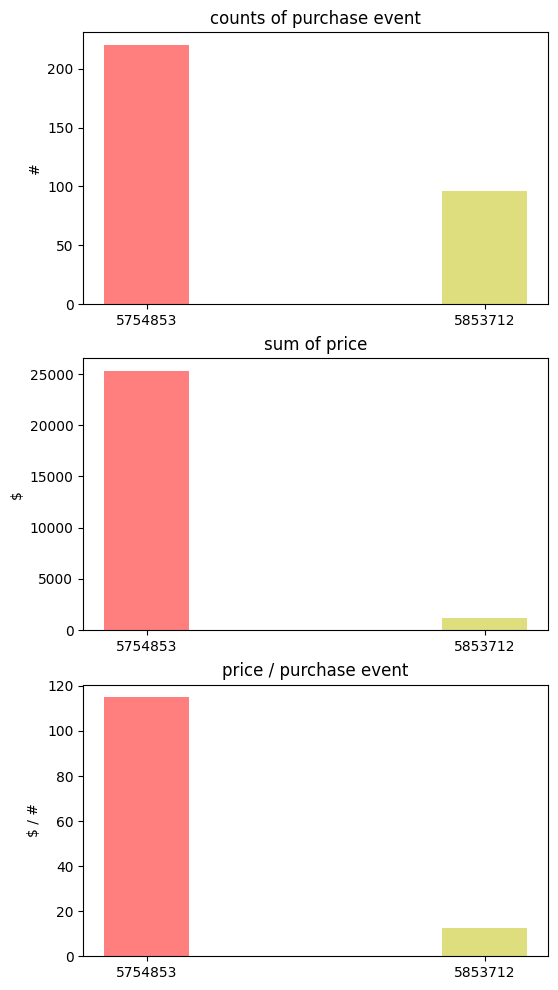

In [ ]:
fig, axes = plt.subplots(figsize=(6,12), nrows=3, ncols=1)

color_list = color = ['r', 'y']
bar_width = 0.25

# purchase 이벤트 수 비교
axes[0].bar(['5754853', '5853712'], [product_funnel.loc[5754853, 'purchase'], product_funnel.loc[5853712, 'purchase']], bar_width, color=color_list, alpha = 0.5)
axes[0].set_title('counts of purchase event')
axes[0].set_ylabel('#')

# 매출 비교
axes[1].bar(['5754853', '5853712'], [product_funnel.loc[5754853, 'price'], product_funnel.loc[5853712, 'price']], bar_width, color=color_list, alpha = 0.5)
axes[1].set_title('sum of price')
axes[1].set_ylabel('$')

# purchase 이벤트당 매출 비교
axes[2].bar(['5754853', '5853712'], [product_funnel.loc[5754853, 'price per purchase'], product_funnel.loc[5853712, 'price per purchase']], bar_width, color=color_list, alpha = 0.5)
axes[2].set_title('price / purchase event')
axes[2].set_ylabel('$ / #')

plt.show()